In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel("updatedhamspamdatanew.xlsx", engine="openpyxl")

# Display basic info
print("Dataset Overview:")
print(df.info())  # Check data types and missing values
print("\nFirst 5 Rows:")
print(df.head())

# Standardize column namesRr̥
df.columns = df.columns.str.strip().str.lower()r

# Remove duplicates
df.drop_duplicates(inplace=True)

# Drop missing values (if any)
df.dropna(inplace=True)

# Check class distribution
print("\nLabel Distribution:")
print(df['labels'].value_counts())

# Save cleaned dataset (optional)
df = pd.read_excel("updatedhamspamdatanew.xlsx", engine="openpyxl")

print("\n✅ Data Cleaning Done!")


SyntaxError: invalid syntax (590667627.py, line 13)

# EDA 
✅ Check for missing values

✅ Analyze the label distribution

✅ Visualize text length in spam vs. ham messages

✅ Display common words used in spam and ham messages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the cleaned dataset
file_path = "updatedhamspamdatanew.xlsx"  # Ensure this is the correct filename
df = pd.read_excel(file_path)

# Display the first few rows
df.head()


labels                                           English   \
0    ham  Go until jurong point, crazy.. Available only ...   
1    ham                      Ok lar... Joking wif u oni...   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3    ham  U dun say so early hor... U c already then say...   
4    ham  Nah I don't think he goes to usf, he lives aro...   

                                             German   \
0  Gehen Sie bis jurong Punkt, verrÃ¼ckt.. VerfÃ¼...   
1                      Ok Lar... joking wif u oni...   
2  Freier Eintritt in 2 a wkly comp zum Gewinn FA...   
3    U dun sagen so frÃ¼h... U c schon dann sagen...   
4  Nein, ich glaube nicht, dass er zu unsf geht, ...   

                                              French  \
0  Allez jusqu'Ã  Jurong point, fou.. Disponible ...   
1           J'ai fait une blague sur le wif u oni...   
2  EntrÃ©e libre dans 2 a wkly comp pour gagner F...   
3    U dun dit si tÃ´t hor... U c dÃ©jÃ  dire alors…   
4  Non, je ne pense pas qu'il va Ã  usf, il vit d...   

                                              Hindi          Audio  
0  जुरोंग प्वाइंट तक जाओ, पागल.. केवल बुगिस एन ग्...  🔊 Play Audio  
1       ठीक है ला... तुम्हारे साथ मजाक कर रहा हूँ...  🔊 Play Audio  
2  21 मई 2005 को एफए कप फाइनल टिकट जीतने के लिए 2...  🔊 Play Audio  
3  तुम इतनी जल्दी नहीं कहते... तुम पहले से ही कहत...  🔊 Play Audio  
4  नहीं, मुझे नहीं लगता कि वह यूएसएफ जाता है, हाल...  🔊 Play Audio

In [4]:
# Display dataset information
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    5572 non-null   object
 1   English   5572 non-null   object
 2   German    5559 non-null   object
 3   French    5571 non-null   object
 4   Hindi     5572 non-null   object
 5   Audio     5429 non-null   object
dtypes: object(6)
memory usage: 261.3+ KB


In [5]:
# Check for missing values
print("Missing Values:")
df.isnull().sum()


Missing Values:


labels        0
English       0
German       13
French        1
Hindi         0
Audio       143
dtype: int64

In [5]:
print(df.columns)


Index(['labels', 'English ', 'German ', 'French', 'Hindi ', 'Audio'], dtype='object')


In [7]:
df.columns = df.columns.str.strip()
print(df.columns)  # Verify the cleaned column names


Index(['labels', 'English', 'German', 'French', 'Hindi', 'Audio'], dtype='object')


In [8]:
# Fill missing values in German, French columns with corresponding English text
df['German'].fillna(df['English'], inplace=True)
df['French'].fillna(df['English'], inplace=True)

# Replace missing Audio values with 'No Audio Available'
df['Audio'].fillna('No Audio Available', inplace=True)

# Check if missing values are handled
print("Missing Values After Filling:\n", df.isnull().sum())


Missing Values After Filling:
 labels     0
English    0
German     0
French     0
Hindi      0
Audio      0
dtype: int64


C:\Users\Indrajit\AppData\Local\Temp\ipykernel_11716\780842114.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="labels", data=df, ax=axes[row, col], palette="viridis")
C:\Users\Indrajit\AppData\Local\Temp\ipykernel_11716\780842114.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="labels", data=df, ax=axes[row, col], palette="viridis")
C:\Users\Indrajit\AppData\Local\Temp\ipykernel_11716\780842114.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="labels", data=df, ax=axes[row, col], palette="viridis")
C:\Users\Indraji

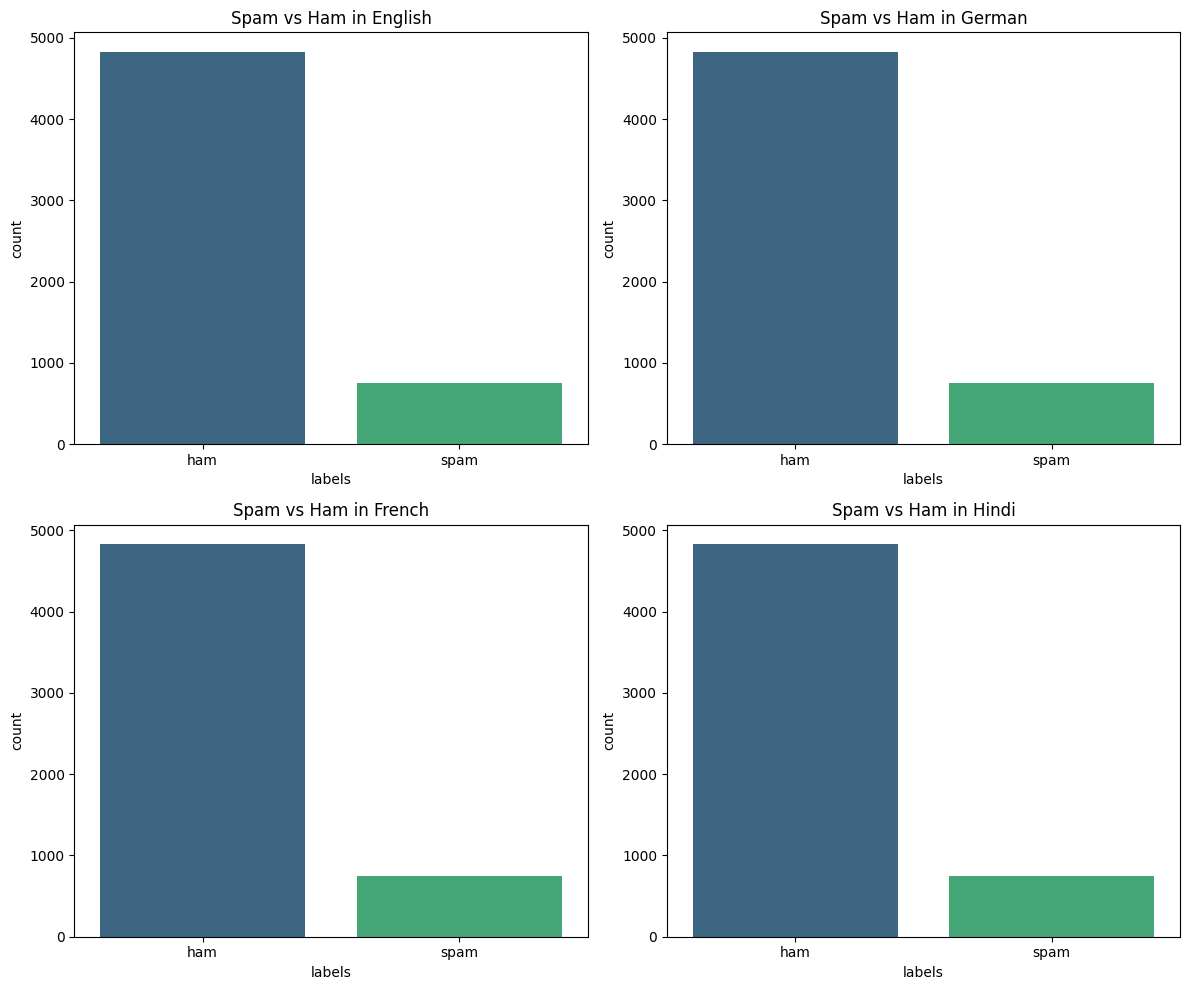

In [9]:
# Create subplots for each language
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Languages list
languages = ["English", "German", "French", "Hindi"]
colors = ["blue", "red", "green", "purple"]

# Loop through languages and plot
for i, lang in enumerate(languages):
    row, col = i // 2, i % 2
    sns.countplot(x="labels", data=df, ax=axes[row, col], palette="viridis")
    axes[row, col].set_title(f"Spam vs Ham in {lang}")

plt.tight_layout()
plt.show()


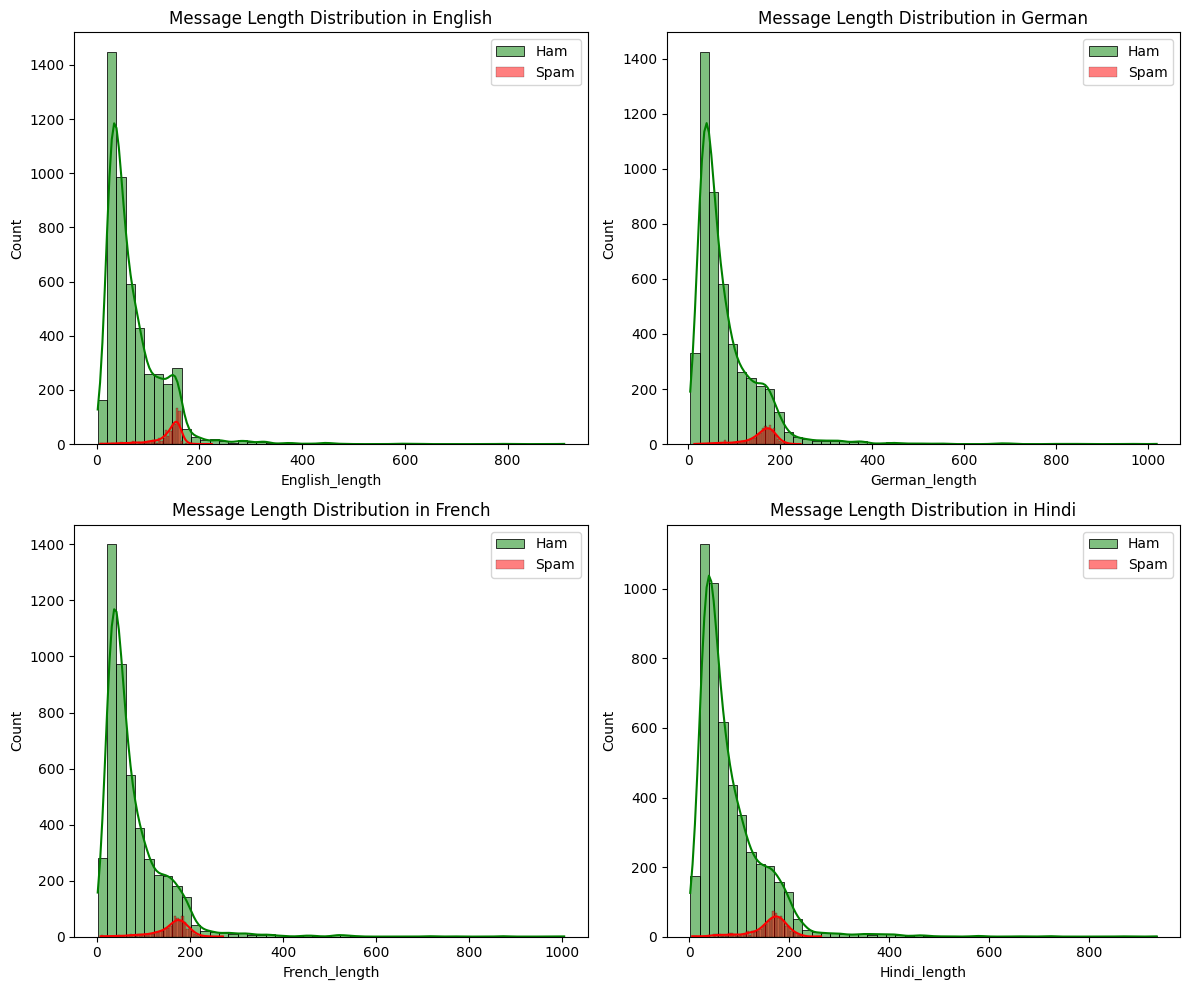

In [9]:
# Add text length columns for each language
for lang in ["English", "German", "French", "Hindi"]:
    df[f"{lang}_length"] = df[lang].astype(str).apply(len)

# Plot text length distribution for each language
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, lang in enumerate(["English", "German", "French", "Hindi"]):
    row, col = i // 2, i % 2
    sns.histplot(df[df["labels"] == "ham"][f"{lang}_length"], bins=50, kde=True, color="green", label="Ham", ax=axes[row, col])
    sns.histplot(df[df["labels"] == "spam"][f"{lang}_length"], bins=50, kde=True, color="red", label="Spam", ax=axes[row, col])
    axes[row, col].legend()
    axes[row, col].set_title(f"Message Length Distribution in {lang}")

plt.tight_layout()
plt.show()


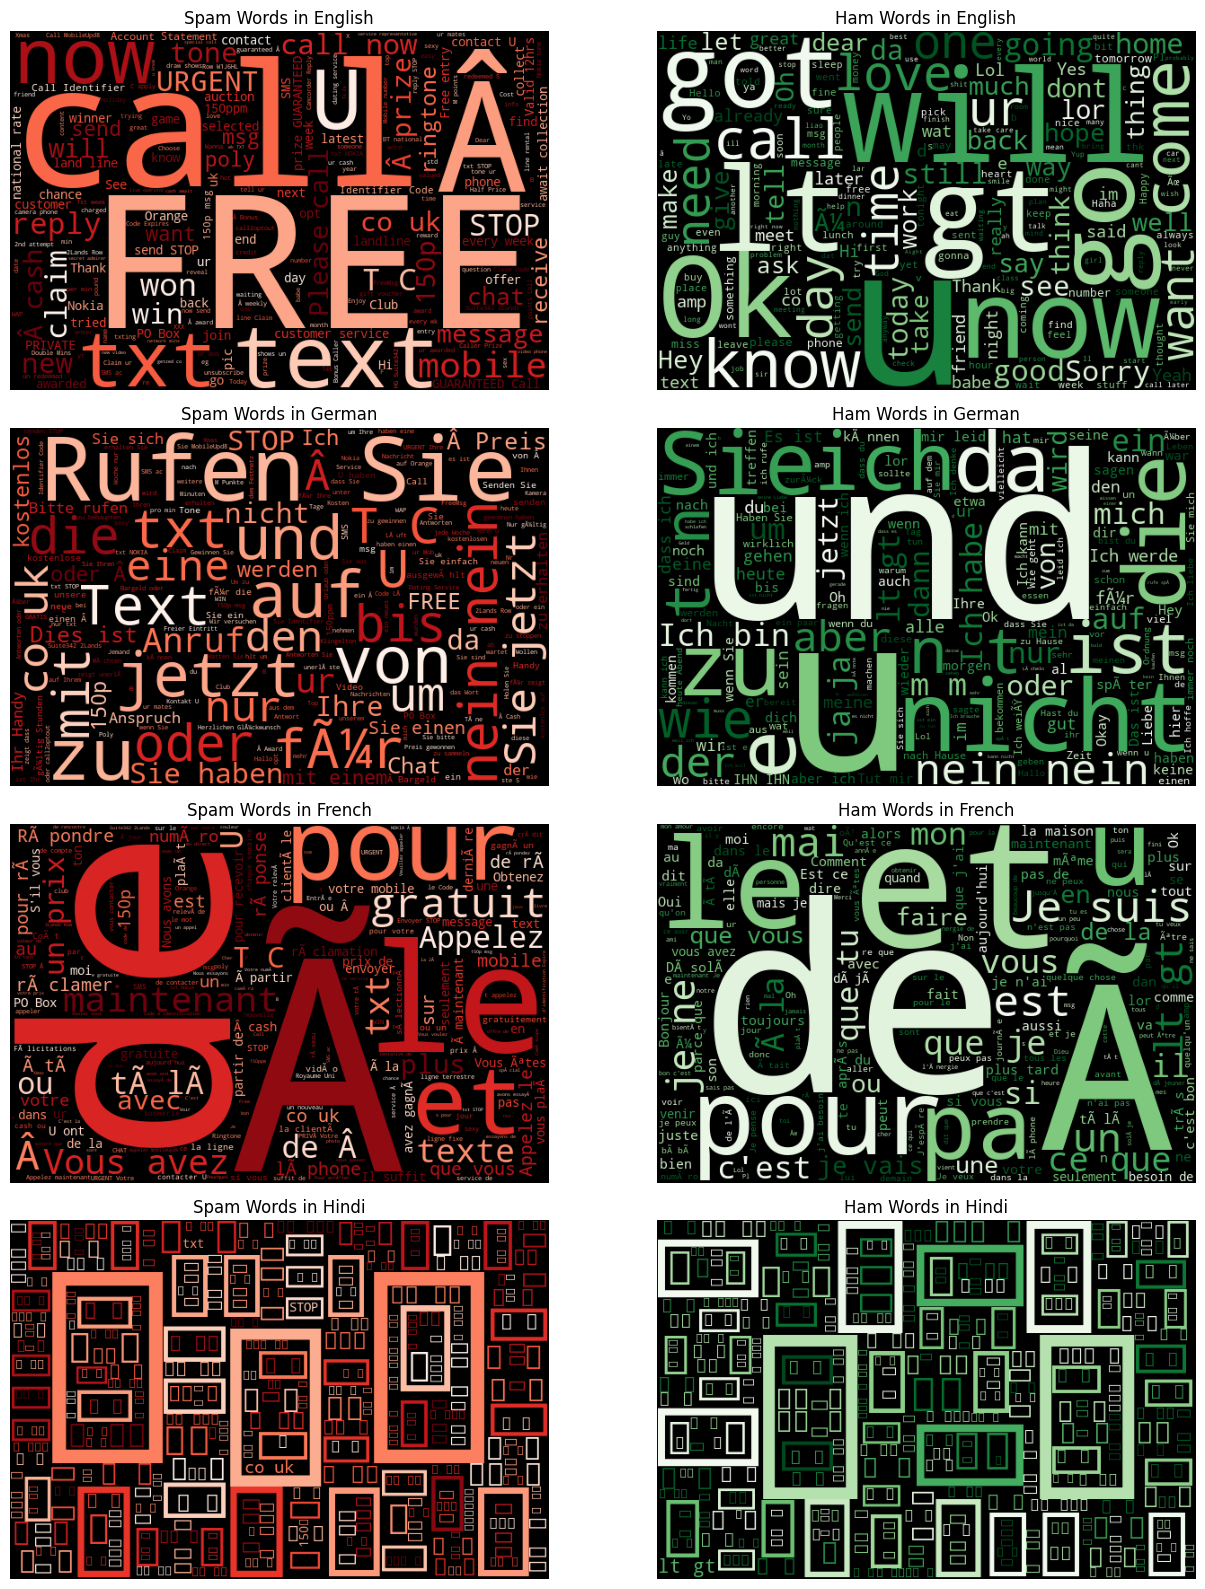

In [10]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create subplots for each language (Spam & Ham)
fig, axes = plt.subplots(4, 2, figsize=(14, 16))  # 4 languages, 2 columns (Spam | Ham)

languages = ["English", "German", "French", "Hindi"]

for i, lang in enumerate(languages):
    spam_words = " ".join(df[df["labels"] == "spam"][lang].dropna().astype(str))
    ham_words = " ".join(df[df["labels"] == "ham"][lang].dropna().astype(str))

    # Generate Word Clouds
    spam_wc = WordCloud(width=600, height=400, background_color="black", colormap="Reds").generate(spam_words)
    ham_wc = WordCloud(width=600, height=400, background_color="black", colormap="Greens").generate(ham_words)

    # Display Spam WordCloud
    axes[i, 0].imshow(spam_wc)
    axes[i, 0].axis("off")
    axes[i, 0].set_title(f"Spam Words in {lang}")

    # Display Ham WordCloud
    axes[i, 1].imshow(ham_wc)
    axes[i, 1].axis("off")
    axes[i, 1].set_title(f"Ham Words in {lang}")

plt.tight_layout()
plt.show()


In [11]:
hindi_font_path = "NotoSansDevanagari-Regular.ttf"

In [12]:
hindi_font_path = r"C:\Users\Indrajit\Documents\NotoSansDevanagari-VariableFont_wdth,wght.ttf"

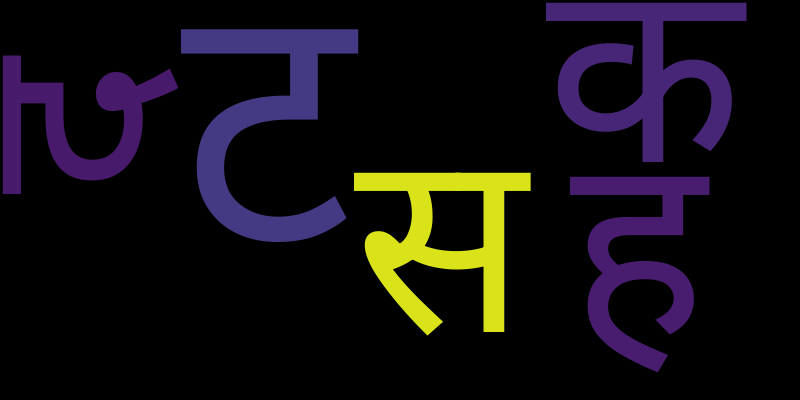

In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path=hindi_font_path, width=800, height=400).generate("हिंदी टेक्स्ट")
wordcloud.to_image()


In [14]:
pip install pillow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import os

hindi_font_path =r"C:\Users\Indrajit\Downloads\Noto_Sans_Devanagari"

if os.path.exists(hindi_font_path):
    print("✅ Font file found!")
else:
    print("❌ Font file NOT found! Check the path.")


✅ Font file found!


In [16]:
r"C:\Users\Indrajit\Documents"

'C:\\Users\\Indrajit\\Documents'

In [16]:
hindi_font_path = r"C:\Users\Indrajit\Documents\Mangal Regular\Mangal Regular.ttf"


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 108 (l) missing from font(s) Mangal.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 112 (p) missing from font(s) Mangal.
  fig.canvas.print_figure(bytes_io, **kw)


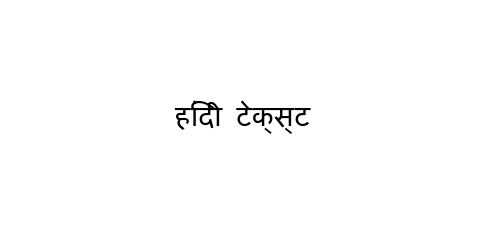

In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Load Hindi font
hindi_font_path = r"C:\Users\Indrajit\Documents\Mangal Regular\Mangal Regular.ttf"
hindi_font = font_manager.FontProperties(fname=hindi_font_path)

# Test Hindi Text Rendering
plt.figure(figsize=(6,3))
plt.text(0.5, 0.5, "हिंदी टेक्स्ट", fontproperties=hindi_font, fontsize=20, ha='center')
plt.axis("off")
plt.show()


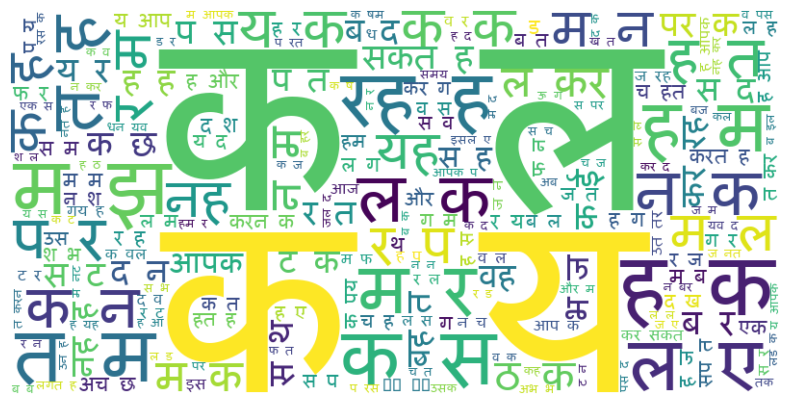

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load Hindi spam & ham messages
hindi_text = " ".join(df['Hindi'].dropna())  # Merge all messages

# Generate word cloud
wordcloud = WordCloud(font_path=hindi_font_path, width=800, height=400, background_color='white').generate(hindi_text)

# Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


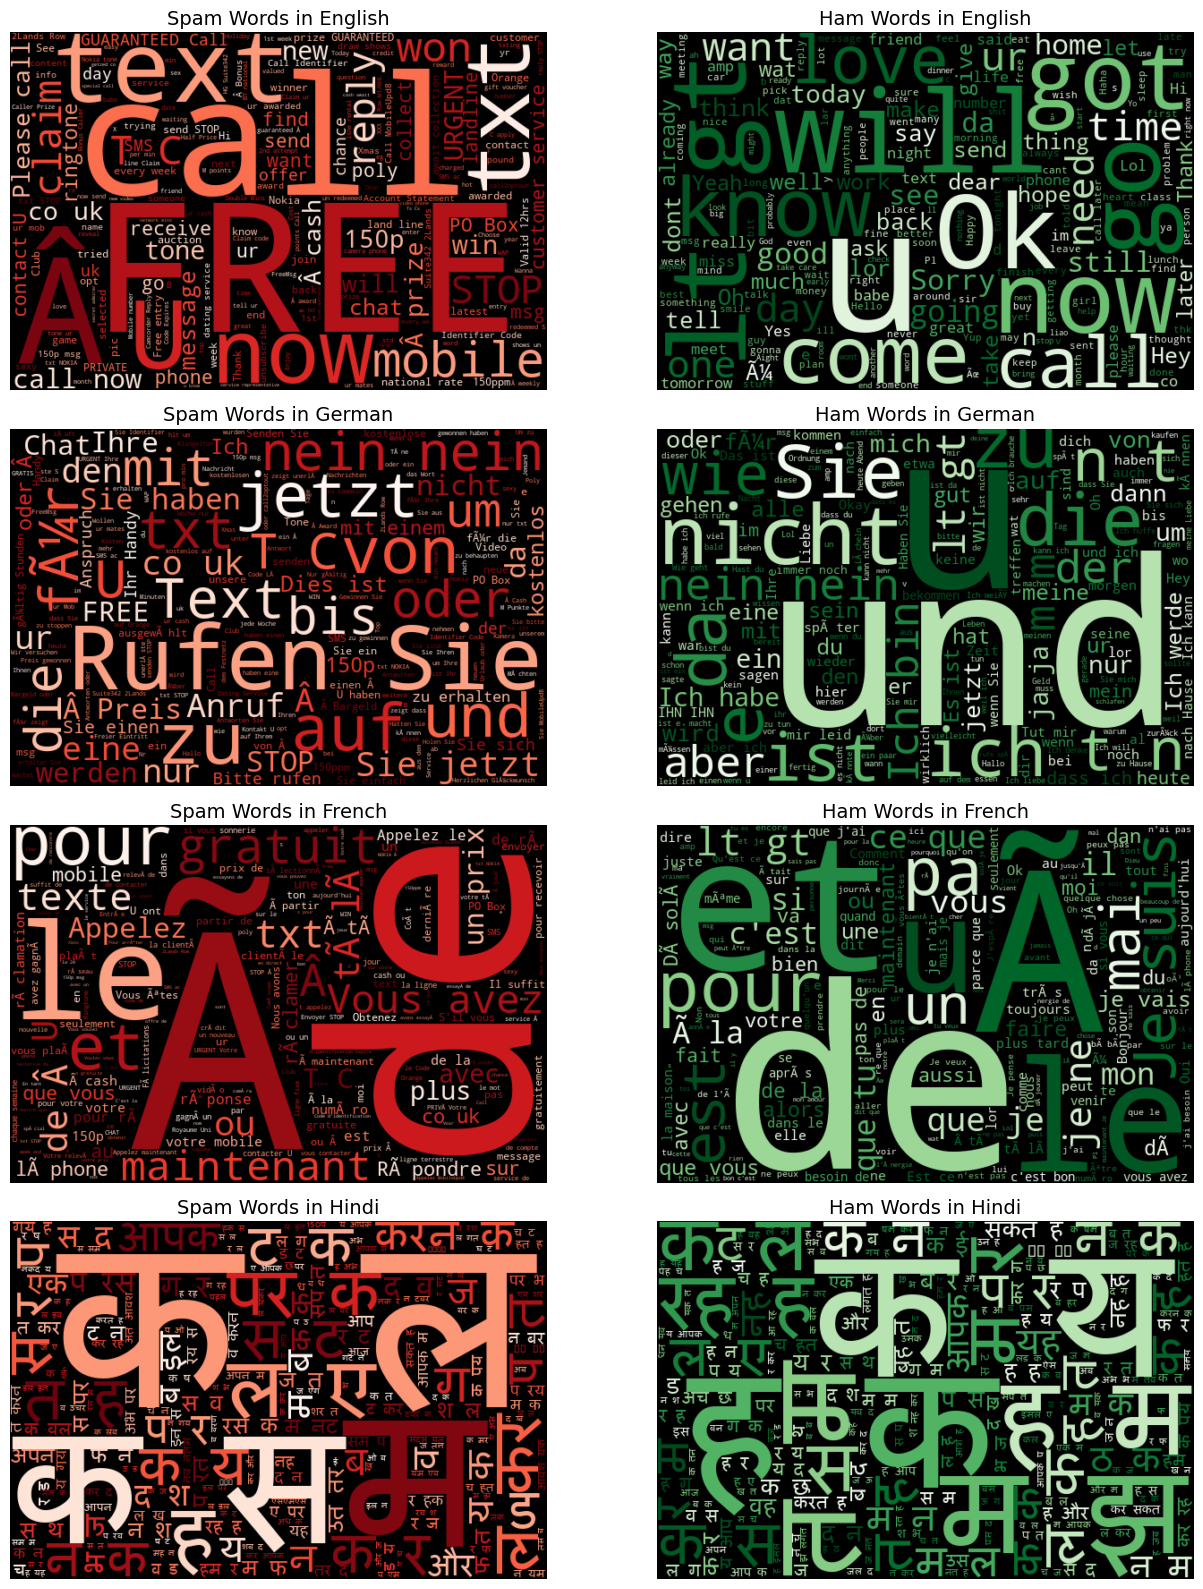

In [19]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create subplots for each language (Spam & Ham)
fig, axes = plt.subplots(4, 2, figsize=(14, 16))  # 4 languages, 2 columns (Spam | Ham)

# Define languages and font paths
languages = ["English", "German", "French", "Hindi"]
font_paths = {"Hindi": hindi_font_path}  # Use special font only for Hindi

for i, lang in enumerate(languages):
    spam_words = " ".join(df[df["labels"] == "spam"][lang].dropna().astype(str))
    ham_words = " ".join(df[df["labels"] == "ham"][lang].dropna().astype(str))

    # Generate Word Clouds with font support for Hindi
    spam_wc = WordCloud(
        font_path=font_paths.get(lang, None),  # Use Hindi font for Hindi
        width=600, height=400, background_color="black", colormap="Reds"
    ).generate(spam_words)

    ham_wc = WordCloud(
        font_path=font_paths.get(lang, None),  # Use Hindi font for Hindi
        width=600, height=400, background_color="black", colormap="Greens"
    ).generate(ham_words)

    # Display Spam WordCloud
    axes[i, 0].imshow(spam_wc, interpolation="bilinear")
    axes[i, 0].axis("off")
    axes[i, 0].set_title(f"Spam Words in {lang}", fontsize=14)

    # Display Ham WordCloud
    axes[i, 1].imshow(ham_wc, interpolation="bilinear")
    axes[i, 1].axis("off")
    axes[i, 1].set_title(f"Ham Words in {lang}", fontsize=14)

plt.tight_layout()
plt.show()


# Step 3: Text Preprocessing
We will now clean and preprocess the text in all four languages:

1️⃣ Convert to lowercase

2️⃣ Remove special characters, numbers, and extra spaces

3️⃣ Remove stopwords (specific to each language)

4️⃣ Tokenize & Lemmatize words

In [20]:
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm
!python -m spacy download fr_core_news_sm
!python -m spacy download hi_core_news_sm


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
     ---------------------------------------- 0.2/12.8 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.6/12.8 MB 5.0 MB/s eta 0:00:03
     -- ------------------------------------- 0.8/12.8 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.8 MB 4.5 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/12.8 MB 4.4 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/12.8 MB 4.2 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/12.8 MB 4.2 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 4.2

In [23]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Indrajit/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
import spacy
nlp_en = spacy.load("en_core_web_sm")
nlp_de = spacy.load("de_core_news_sm")
nlp_fr = spacy.load("fr_core_news_sm")
nlp_hi = spacy.load("hi_core_news_sm")

OSError: [E050] Can't find model 'hi_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [25]:
!python -m spacy download hi_core_news_sm


[x] No compatible package found for 'hi_core_news_sm' (spaCy
v3.8.4)



In [26]:
import re
import nltk
import spacy
import pandas as pd
from nltk.corpus import stopwords
from spacy.lang.en.
import STOP_WORDS as en_stopwords
from spacy.lang.de.stop_words import STOP_WORDS as de_stopwords
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stopwords
from tqdm import tqdm  # For progress bar

# Download NLTK stopwords
nltk.download("stopwords")

# Load Spacy NLP models
nlp_en = spacy.load("en_core_web_sm")
nlp_de = spacy.load("de_core_news_sm")
nlp_fr = spacy.load("fr_core_news_sm")

# Use NLTK Hindi stopwords instead
nltk.download("stopwords")
hi_stopwords = set(stopwords.words("hindi"))


SyntaxError: invalid syntax (2908939556.py, line 6)

In [27]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Indrajit/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords
print("Available languages:", stopwords.fileids())  # Check available languages


Available languages: ['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hindi', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'tamil', 'turkish']


In [29]:
import nltk
import os

# Hindi stopwords list (manually defined)
hindi_stopwords = [
    "और", "के", "का", "है", "हैं", "को", "में", "की", "पर", "से", "यह", "इस", "था", "थे", 
    "लिए", "भी", "ही", "रहा", "रहे", "जैसे", "कि", "तो", "तक", "उस", "इसे", "वह", "गया", "हो", "कर", "नहीं"
]

# Define custom stopwords path
hindi_stopwords_path = os.path.join(nltk.data.path[0], "corpora/stopwords/hindi")

# Create and save stopwords file
os.makedirs(os.path.dirname(hindi_stopwords_path), exist_ok=True)
with open(hindi_stopwords_path, "w", encoding="utf-8") as f:
    f.write("\n".join(hindi_stopwords))

print("✅ Hindi stopwords successfully added!")

# Check if stopwords can be loaded
from nltk.corpus import stopwords
stopwords.words('hindi')[:10]  # Display first 10 stopwords


✅ Hindi stopwords successfully added!


['और', 'के', 'का', 'है', 'हैं', 'को', 'में', 'की', 'पर', 'से']

In [30]:
# Import required libraries
from nltk.corpus import stopwords

# Manually define Hindi stopwords
hindi_stopwords = set(["और", "के", "हैं", "का", "में", "से", "कि", "की", "को", "यह", "पर", "इस", "भी", "हुआ", "था", "नहीं"])

# Add manually created stopwords to the existing stopwords dictionary
stop_words = {
    "english": set(stopwords.words("english")),
    "german": set(stopwords.words("german")),
    "french": set(stopwords.words("french")),
    "hindi": hindi_stopwords  # Use manually defined stopwords
}

print("✅ Stopwords successfully loaded for all languages!")


✅ Stopwords successfully loaded for all languages!


In [31]:
import re

def clean_text(text):
    if isinstance(text, str):  # Ensure it's a string before processing
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-zA-Z0-9\u0900-\u097F\u00C0-\u00FF\s]', '', text)  # Keep letters, numbers, spaces
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning to all languages
for lang in ["English", "German", "French", "Hindi"]:
    df[lang] = df[lang].apply(clean_text)

df.head()  # Show the cleaned text


labels                                            English  \
0    ham  go until jurong point crazy available only in ...   
1    ham                            ok lar joking wif u oni   
2   spam  free entry in 2 a wkly comp to win fa cup fina...   
3    ham        u dun say so early hor u c already then say   
4    ham  nah i dont think he goes to usf he lives aroun...   

                                              German  \
0  gehen sie bis jurong punkt verrãckt verfãgbar ...   
1                            ok lar joking wif u oni   
2  freier eintritt in 2 a wkly comp zum gewinn fa...   
3           u dun sagen so frãh u c schon dann sagen   
4  nein ich glaube nicht dass er zu unsf geht er ...   

                                              French  \
0  allez jusquã jurong point fou disponible seule...   
1               jai fait une blague sur le wif u oni   
2  entrãe libre dans 2 a wkly comp pour gagner fa...   
3           u dun dit si tãt hor u c dãjã dire alors   
4  non je ne pense pas quil va ã usf il vit dans ...   

                                               Hindi         Audio  
0  जुरोंग प्वाइंट तक जाओ पागल केवल बुगिस एन ग्रेट...  🔊 Play Audio  
1             ठीक है ला तुम्हारे साथ मजाक कर रहा हूँ  🔊 Play Audio  
2  21 मई 2005 को एफए कप फाइनल टिकट जीतने के लिए 2...  🔊 Play Audio  
3    तुम इतनी जल्दी नहीं कहते तुम पहले से ही कहते हो  🔊 Play Audio  
4  नहीं मुझे नहीं लगता कि वह यूएसएफ जाता है हालाँ...  🔊 Play Audio

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from indicnlp.tokenize import indic_tokenize

nltk.download('punkt')  # Download tokenizer model for English, German, and French

def tokenize_text(text, lang):
    if isinstance(text, str):  # Ensure it's a string before processing
        if lang == "Hindi":
            return indic_tokenize.trivial_tokenize(text)  # Use Indic NLP for Hindi
        else:
            return word_tokenize(text)  # Use NLTK for other languages
    return []

# Apply tokenization
for lang in ["English", "German", "French", "Hindi"]:
    df[lang] = df[lang].apply(lambda x: tokenize_text(x, lang))

df.head()  # Check tokenized text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Indrajit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


labels                                            English  \
0    ham  [go, until, jurong, point, crazy, available, o...   
1    ham                     [ok, lar, joking, wif, u, oni]   
2   spam  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3    ham  [u, dun, say, so, early, hor, u, c, already, t...   
4    ham  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                              German  \
0  [gehen, sie, bis, jurong, punkt, verrãckt, ver...   
1                     [ok, lar, joking, wif, u, oni]   
2  [freier, eintritt, in, 2, a, wkly, comp, zum, ...   
3  [u, dun, sagen, so, frãh, u, c, schon, dann, s...   
4  [nein, ich, glaube, nicht, dass, er, zu, unsf,...   

                                              French  \
0  [allez, jusquã, jurong, point, fou, disponible...   
1     [jai, fait, une, blague, sur, le, wif, u, oni]   
2  [entrãe, libre, dans, 2, a, wkly, comp, pour, ...   
3  [u, dun, dit, si, tãt, hor, u, c, dãjã, dire, ...   
4  [non, je, ne, pense, pas, quil, va, ã, usf, il...   

                                               Hindi         Audio  
0  [जुरोंग, प्वाइंट, तक, जाओ, पागल, केवल, बुगिस, ...  🔊 Play Audio  
1   [ठीक, है, ला, तुम्हारे, साथ, मजाक, कर, रहा, हूँ]  🔊 Play Audio  
2  [21, मई, 2005, को, एफए, कप, फाइनल, टिकट, जीतने...  🔊 Play Audio  
3  [तुम, इतनी, जल्दी, नहीं, कहते, तुम, पहले, से, ...  🔊 Play Audio  
4  [नहीं, मुझे, नहीं, लगता, कि, वह, यूएसएफ, जाता,...  🔊 Play Audio

In [33]:
import re

def normalize_text(tokens):
    if isinstance(tokens, list):
        return [re.sub(r'[^a-zA-Z0-9\u0900-\u097F]', '', token).lower() for token in tokens if token.strip()]
    return []

# Apply normalization
for lang in ["English", "German", "French", "Hindi"]:
    df[lang] = df[lang].apply(normalize_text)

df.head()  # Check normalized text


labels                                            English  \
0    ham  [go, until, jurong, point, crazy, available, o...   
1    ham                     [ok, lar, joking, wif, u, oni]   
2   spam  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3    ham  [u, dun, say, so, early, hor, u, c, already, t...   
4    ham  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                              German  \
0  [gehen, sie, bis, jurong, punkt, verrckt, verf...   
1                     [ok, lar, joking, wif, u, oni]   
2  [freier, eintritt, in, 2, a, wkly, comp, zum, ...   
3  [u, dun, sagen, so, frh, u, c, schon, dann, sa...   
4  [nein, ich, glaube, nicht, dass, er, zu, unsf,...   

                                              French  \
0  [allez, jusqu, jurong, point, fou, disponible,...   
1     [jai, fait, une, blague, sur, le, wif, u, oni]   
2  [entre, libre, dans, 2, a, wkly, comp, pour, g...   
3  [u, dun, dit, si, tt, hor, u, c, dj, dire, alors]   
4  [non, je, ne, pense, pas, quil, va, , usf, il,...   

                                               Hindi         Audio  
0  [जुरोंग, प्वाइंट, तक, जाओ, पागल, केवल, बुगिस, ...  🔊 Play Audio  
1   [ठीक, है, ला, तुम्हारे, साथ, मजाक, कर, रहा, हूँ]  🔊 Play Audio  
2  [21, मई, 2005, को, एफए, कप, फाइनल, टिकट, जीतने...  🔊 Play Audio  
3  [तुम, इतनी, जल्दी, नहीं, कहते, तुम, पहले, से, ...  🔊 Play Audio  
4  [नहीं, मुझे, नहीं, लगता, कि, वह, यूएसएफ, जाता,...  🔊 Play Audio

In [34]:
import nltk
print(nltk.r"C:\Users\Indrajit\Downloads\stopwords")

SyntaxError: invalid syntax (1066130977.py, line 2)

In [ ]:
C:\Users\Indrajit\Downloads\stopwords (1)

In [ ]:
r"C:\Users\Indrajit\Downloads\stopwords (1)\stopwords"

In [ ]:
r"C:\Users\Indrajit\nltk_data\corpora\stopwords"


In [35]:
languages = ["english", "german", "french", "hinglish"]  # Hindi uses 'hinglish' in nltk
for lang in languages:
    try:
        stop_words = set(stopwords.words(lang))
        print(f"Stopwords in {lang.capitalize()} (First 10):", list(stop_words)[:10])
    except Exception as e:
        print(f"Error loading stopwords for {lang}: {e}")


Stopwords in English (First 10): ["they'd", "you'll", "she'd", 'them', 'nor', "we've", 'a', 'he', "he'll", 'ain']
Stopwords in German (First 10): ['dir', 'euch', 'unter', 'weil', 'zwischen', 'keine', 'deinen', 'jener', 'deinem', 'ihn']
Stopwords in French (First 10): ['leur', 'aurions', 'un', 'fusse', 'en', 'ayant', 'serions', 'est', 'étiez', 'seraient']
Stopwords in Hinglish (First 10): ['unless', 'least', 'them', 'inkaa', 'jaha', 'something', 'elsewhere', 'six', 'un', 'get']


In [36]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords data
nltk.download('stopwords')

# Now you can use stopwords for different languages
stopwords_en = stopwords.words('english')
stopwords_de = stopwords.words('german')
stopwords_fr = stopwords.words('french')
stopwords_hi = stopwords.words('hindi')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Indrajit/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [37]:
sample_texts = {
    "english": "This is a sample message to check stopwords.",
    "german": "Das ist eine Beispielnachricht zur Überprüfung der Stoppwörter.",
    "french": "Ceci est un message d'exemple pour vérifier les mots vides.",
    "hinglish": "यह एक परीक्षण संदेश है स्टॉपवर्ड्स की जाँच करने के लिए।"
}

for lang, text in sample_texts.items():
    words = text.split()
    stop_words = set(stopwords.words(lang))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    print(f"\nOriginal ({lang.capitalize()}): {text}")
    print(f"After Removing Stopwords: {' '.join(filtered_words)}")



Original (English): This is a sample message to check stopwords.
After Removing Stopwords: sample message check stopwords.

Original (German): Das ist eine Beispielnachricht zur Überprüfung der Stoppwörter.
After Removing Stopwords: Beispielnachricht Überprüfung Stoppwörter.

Original (French): Ceci est un message d'exemple pour vérifier les mots vides.
After Removing Stopwords: Ceci message d'exemple vérifier mots vides.

Original (Hinglish): यह एक परीक्षण संदेश है स्टॉपवर्ड्स की जाँच करने के लिए।
After Removing Stopwords: यह एक परीक्षण संदेश है स्टॉपवर्ड्स की जाँच करने के लिए।


In [38]:
from nltk.corpus import stopwords
from indicnlp.tokenize import indic_tokenize

# ✅ Manually define Hindi stopwords (since nltk stopwords might not have Hindi)
hindi_stopwords = set(["का", "की", "है", "से", "में", "पर", "एक", "के", "लिए", "और", "को"])  # Add more stopwords

# ✅ Sample texts
sample_texts = {
    "english": "This is a sample message to check stopwords.",
    "german": "Das ist eine Beispielnachricht zur Überprüfung der Stoppwörter.",
    "french": "Ceci est un message d'exemple pour vérifier les mots vides.",
    "hindi": "यह एक परीक्षण संदेश है स्टॉपवर्ड्स की जाँच करने के लिए।"
}

# ✅ Process stopwords removal
for lang, text in sample_texts.items():
    words = text.split()
    
    # Handle Hindi separately
    if lang == "hindi":
        filtered_words = [word for word in words if word not in hindi_stopwords]
    else:
        stop_words = set(stopwords.words(lang))  # Use nltk stopwords for other languages
        filtered_words = [word for word in words if word.lower() not in stop_words]
    
    print(f"\nOriginal ({lang.capitalize()}): {text}")
    print(f"After Removing Stopwords: {' '.join(filtered_words)}")



Original (English): This is a sample message to check stopwords.
After Removing Stopwords: sample message check stopwords.

Original (German): Das ist eine Beispielnachricht zur Überprüfung der Stoppwörter.
After Removing Stopwords: Beispielnachricht Überprüfung Stoppwörter.

Original (French): Ceci est un message d'exemple pour vérifier les mots vides.
After Removing Stopwords: Ceci message d'exemple vérifier mots vides.

Original (Hindi): यह एक परीक्षण संदेश है स्टॉपवर्ड्स की जाँच करने के लिए।
After Removing Stopwords: यह परीक्षण संदेश स्टॉपवर्ड्स जाँच करने लिए।


In [39]:
import re
import spacy
from nltk.tokenize import word_tokenize

# ✅ Load SpaCy models
nlp_models = {
    "english": spacy.load("en_core_web_sm"),
    "german": spacy.load("de_core_news_sm"),
    "french": spacy.load("fr_core_news_sm")
}

# ✅ Preprocessing Function
def preprocess_text(text, lang):
    if isinstance(text, list):  
        text = " ".join(text)  # Convert list to string

    # Convert to lowercase
    text = text.lower()

    # Remove special characters & numbers
    text = re.sub(r"[^a-zA-ZÀ-ÿअ-ह़क़-ॡ0-9\s]", "", text)

    # Process Hindi separately
    if lang == "hindi":
        words = indic_tokenize.trivial_tokenize(text)  # Tokenize Hindi text
        filtered_words = [word for word in words if word not in hindi_stopwords]
        return " ".join(filtered_words)
    
    # Process other languages
    doc = nlp_models[lang](text)  # NLP processing
    stop_words = set(stopwords.words(lang.lower()))  
    return " ".join([token.lemma_ for token in doc if token.text.lower() not in stop_words and token.is_alpha])


In [40]:
print(df.columns)


Index(['labels', 'English', 'German', 'French', 'Hindi', 'Audio'], dtype='object')


In [41]:
df.columns = df.columns.str.strip()


In [61]:
# ✅ Process Hindi first (since it's handled differently)
df["Hindi"] = df["Hindi"].apply(lambda x: preprocess_text(str(x), "Hindi"))

# ✅ Then process English, German, and French
for lang in ["English", "German", "French"]:
    df[lang] = df[lang].apply(lambda x: preprocess_text(str(x), lang))

df.head()


KeyError: 'Hindi'

In [62]:
# ✅ Ensure all column names are clean
df.columns = df.columns.str.strip()

# ✅ Verify the actual column names
print(df.columns)  # This will confirm the exact names

# ✅ Now apply preprocessing
df["Hindi"] = df["Hindi"].apply(lambda x: preprocess_text(str(x), "Hindi"))

for lang in ["English", "German", "French"]:
    df[lang] = df[lang].apply(lambda x: preprocess_text(str(x), lang))

df.head()


Index(['labels', 'English', 'German', 'French', 'Hindi', 'Audio'], dtype='object')


KeyError: 'Hindi'

In [44]:
print(df.columns.tolist())


['labels', 'English', 'German', 'French', 'Hindi', 'Audio']


In [45]:
print(df.dtypes)


labels     object
English    object
German     object
French     object
Hindi      object
Audio      object
dtype: object


In [46]:
print(df["Hindi"].isnull().sum())  # Count missing values
print(df["Hindi"].head())  # Show sample data


0
0    [जुरोंग, प्वाइंट, तक, जाओ, पागल, केवल, बुगिस, ...
1     [ठीक, है, ला, तुम्हारे, साथ, मजाक, कर, रहा, हूँ]
2    [21, मई, 2005, को, एफए, कप, फाइनल, टिकट, जीतने...
3    [तुम, इतनी, जल्दी, नहीं, कहते, तुम, पहले, से, ...
4    [नहीं, मुझे, नहीं, लगता, कि, वह, यूएसएफ, जाता,...
Name: Hindi, dtype: object


In [47]:
df["Hindi"] = df["Hindi"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))


In [48]:
print(df["Hindi"].head())


0    जुरोंग प्वाइंट तक जाओ पागल केवल बुगिस एन ग्रेट...
1               ठीक है ला तुम्हारे साथ मजाक कर रहा हूँ
2    21 मई 2005 को एफए कप फाइनल टिकट जीतने के लिए 2...
3      तुम इतनी जल्दी नहीं कहते तुम पहले से ही कहते हो
4    नहीं मुझे नहीं लगता कि वह यूएसएफ जाता है हालाँ...
Name: Hindi, dtype: object


In [49]:
print([repr(col) for col in df.columns])  # Shows exact column names


["'labels'", "'English'", "'German'", "'French'", "'Hindi'", "'Audio'"]


In [50]:
df.columns = df.columns.str.strip().str.replace("'", "")


In [51]:
print([repr(col) for col in df.columns])


["'labels'", "'English'", "'German'", "'French'", "'Hindi'", "'Audio'"]


In [52]:
df.columns = df.columns.str.strip().str.replace("'", "", regex=False)


In [53]:
print([repr(col) for col in df.columns])


["'labels'", "'English'", "'German'", "'French'", "'Hindi'", "'Audio'"]


In [54]:
df.columns = df.columns.astype(str)  # Ensure column names are strings
df.columns = df.columns.str.strip().str.replace("'", "").str.replace('"', '')


In [55]:
print(df.columns.tolist())


['labels', 'English', 'German', 'French', 'Hindi', 'Audio']


In [56]:
df[["English", "German", "French", "Hindi"]] = df[["English", "German", "French", "Hindi"]].fillna("")


In [57]:
print([col for col in df.columns if "Hindi" in col])


['Hindi']


In [58]:
print(type(df['Hindi']))  # Should be <class 'pandas.core.series.Series'>


<class 'pandas.core.series.Series'>


In [63]:
if "Hindi" in df.columns:
    df["Hindi"] = df["Hindi"].astype(str).apply(lambda x: preprocess_text(x, "Hindi"))

# Then process English, German, and French if they exist
for lang in ["English", "German", "French"]:
    if lang in df.columns:
        df[lang] = df[lang].astype(str).apply(lambda x: preprocess_text(x, lang))


KeyError: 'Hindi'

In [64]:
df.columns = df.columns.astype(str)


In [65]:
df.rename(columns=lambda x: x.strip(), inplace=True)


In [66]:
print(df[["English", "German", "French", "Hindi"]].head())


                                             English  \
0  [go, until, jurong, point, crazy, available, o...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3  [u, dun, say, so, early, hor, u, c, already, t...   
4  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                              German  \
0  [gehen, sie, bis, jurong, punkt, verrckt, verf...   
1                     [ok, lar, joking, wif, u, oni]   
2  [freier, eintritt, in, 2, a, wkly, comp, zum, ...   
3  [u, dun, sagen, so, frh, u, c, schon, dann, sa...   
4  [nein, ich, glaube, nicht, dass, er, zu, unsf,...   

                                              French  \
0  [allez, jusqu, jurong, point, fou, disponible,...   
1     [jai, fait, une, blague, sur, le, wif, u, oni]   
2  [entre, libre, dans, 2, a, wkly, comp, pour, g...   
3  [u, dun, dit, si, tt, hor, u, c, dj, dire, alors]   
4  [non, je, ne, pense, pas, quil, va, , usf, 

In [67]:
print(df["Hindi"].apply(lambda x: x[:5]))  # Show first 5 preprocessed Hindi texts


0       जुरों
1       ठीक ह
2       21 मई
3       तुम इ
4       नहीं 
        ...  
5567    यह दू
5568    क्या 
5569    अफ़सो
5570    उस आद
5571    रोफ़ल
Name: Hindi, Length: 5572, dtype: object


In [68]:
print(df["Hindi"].iloc[0])  # Show first processed Hindi text


जुरोंग प्वाइंट तक जाओ पागल केवल बुगिस एन ग्रेट वर्ल्ड ला ई बुफे में उपलब्ध है वहां सिने को और अधिक देखने को मिला


In [69]:
print(type(df["Hindi"].iloc[0]))  # Check data type of first row


<class 'str'>


In [70]:
from indicnlp.tokenize import indic_tokenize

df["Hindi"] = df["Hindi"].apply(lambda x: " ".join(indic_tokenize.trivial_tokenize(str(x), "hi")))


In [71]:
print(df["Hindi"].iloc[0])


जुरोंग प्वाइंट तक जाओ पागल केवल बुगिस एन ग्रेट वर्ल्ड ला ई बुफे में उपलब्ध है वहां सिने को और अधिक देखने को मिला


In [72]:
from indicnlp.tokenize import indic_tokenize

df["Hindi"] = df["Hindi"].apply(lambda x: " ".join(indic_tokenize.trivial_tokenize(str(x), "hi")))


In [73]:
hindi_stopwords = set(["का", "की", "है", "से", "में", "पर", "एक", "के", "लिए", "और", "को"])  

df["Hindi"] = df["Hindi"].apply(lambda x: " ".join([word for word in x.split() if word not in hindi_stopwords]))


In [74]:
from indicnlp.tokenize import indic_tokenize

text = "जुरोंग प्वाइंट तक जाओ पागल केवल बुगिस एन ग्रेट वर्ल्ड ला ई बुफे में उपलब्ध है वहां सिने को और अधिक देखने को मिला"
tokenized_text = indic_tokenize.trivial_tokenize(text, "hi")

print(tokenized_text)


['जुरोंग', 'प्वाइंट', 'तक', 'जाओ', 'पागल', 'केवल', 'बुगिस', 'एन', 'ग्रेट', 'वर्ल्ड', 'ला', 'ई', 'बुफे', 'में', 'उपलब्ध', 'है', 'वहां', 'सिने', 'को', 'और', 'अधिक', 'देखने', 'को', 'मिला']


In [75]:
hindi_stopwords = set(["का", "की", "है", "से", "में", "पर", "एक", "के", "लिए", "और", "को"])

df["Hindi"] = df["Hindi"].apply(lambda words: [word for word in words if word not in hindi_stopwords])


In [76]:
print(df["Hindi"].iloc[0])


['ज', 'ु', 'र', 'ो', 'ं', 'ग', ' ', 'प', '्', 'व', 'ा', 'इ', 'ं', 'ट', ' ', 'त', 'क', ' ', 'ज', 'ा', 'ओ', ' ', 'प', 'ा', 'ग', 'ल', ' ', 'क', 'े', 'व', 'ल', ' ', 'ब', 'ु', 'ग', 'ि', 'स', ' ', 'ए', 'न', ' ', 'ग', '्', 'र', 'े', 'ट', ' ', 'व', 'र', '्', 'ल', '्', 'ड', ' ', 'ल', 'ा', ' ', 'ई', ' ', 'ब', 'ु', 'फ', 'े', ' ', 'उ', 'प', 'ल', 'ब', '्', 'ध', ' ', 'व', 'ह', 'ा', 'ं', ' ', 'स', 'ि', 'न', 'े', ' ', 'अ', 'ध', 'ि', 'क', ' ', 'द', 'े', 'ख', 'न', 'े', ' ', 'म', 'ि', 'ल', 'ा']


In [77]:
print(df["Hindi"].iloc[0])


['ज', 'ु', 'र', 'ो', 'ं', 'ग', ' ', 'प', '्', 'व', 'ा', 'इ', 'ं', 'ट', ' ', 'त', 'क', ' ', 'ज', 'ा', 'ओ', ' ', 'प', 'ा', 'ग', 'ल', ' ', 'क', 'े', 'व', 'ल', ' ', 'ब', 'ु', 'ग', 'ि', 'स', ' ', 'ए', 'न', ' ', 'ग', '्', 'र', 'े', 'ट', ' ', 'व', 'र', '्', 'ल', '्', 'ड', ' ', 'ल', 'ा', ' ', 'ई', ' ', 'ब', 'ु', 'फ', 'े', ' ', 'उ', 'प', 'ल', 'ब', '्', 'ध', ' ', 'व', 'ह', 'ा', 'ं', ' ', 'स', 'ि', 'न', 'े', ' ', 'अ', 'ध', 'ि', 'क', ' ', 'द', 'े', 'ख', 'न', 'े', ' ', 'म', 'ि', 'ल', 'ा']


In [78]:
from indicnlp.tokenize import indic_tokenize

df["Hindi"] = df["Hindi"].apply(lambda x: indic_tokenize.trivial_tokenize(str(x), "hi"))


In [79]:
print(df["Hindi"].iloc[0])


['[', "'", 'ज', "'", ',', "'", 'ु', "'", ',', "'", 'र', "'", ',', "'", 'ो', "'", ',', "'", 'ं', "'", ',', "'", 'ग', "'", ',', "'", "'", ',', "'", 'प', "'", ',', "'", '्', "'", ',', "'", 'व', "'", ',', "'", 'ा', "'", ',', "'", 'इ', "'", ',', "'", 'ं', "'", ',', "'", 'ट', "'", ',', "'", "'", ',', "'", 'त', "'", ',', "'", 'क', "'", ',', "'", "'", ',', "'", 'ज', "'", ',', "'", 'ा', "'", ',', "'", 'ओ', "'", ',', "'", "'", ',', "'", 'प', "'", ',', "'", 'ा', "'", ',', "'", 'ग', "'", ',', "'", 'ल', "'", ',', "'", "'", ',', "'", 'क', "'", ',', "'", 'े', "'", ',', "'", 'व', "'", ',', "'", 'ल', "'", ',', "'", "'", ',', "'", 'ब', "'", ',', "'", 'ु', "'", ',', "'", 'ग', "'", ',', "'", 'ि', "'", ',', "'", 'स', "'", ',', "'", "'", ',', "'", 'ए', "'", ',', "'", 'न', "'", ',', "'", "'", ',', "'", 'ग', "'", ',', "'", '्', "'", ',', "'", 'र', "'", ',', "'", 'े', "'", ',', "'", 'ट', "'", ',', "'", "'", ',', "'", 'व', "'", ',', "'", 'र', "'", ',', "'", '्', "'", ',', "'", 'ल', "'", ',', "'", '्', "'", ',',

In [80]:
from indicnlp.tokenize import indic_tokenize

# Apply word-level tokenization correctly
df["Hindi"] = df["Hindi"].apply(lambda x: " ".join(indic_tokenize.trivial_tokenize(str(x), "hi")))

# Check the output
print(df["Hindi"].iloc[0])


[ ' [ ' , " ' " , ' ज ' , " ' " , ' , ' , " ' " , ' ु ' , " ' " , ' , ' , " ' " , ' र ' , " ' " , ' , ' , " ' " , ' ो ' , " ' " , ' , ' , " ' " , ' ं ' , " ' " , ' , ' , " ' " , ' ग ' , " ' " , ' , ' , " ' " , " ' " , ' , ' , " ' " , ' प ' , " ' " , ' , ' , " ' " , ' ् ' , " ' " , ' , ' , " ' " , ' व ' , " ' " , ' , ' , " ' " , ' ा ' , " ' " , ' , ' , " ' " , ' इ ' , " ' " , ' , ' , " ' " , ' ं ' , " ' " , ' , ' , " ' " , ' ट ' , " ' " , ' , ' , " ' " , " ' " , ' , ' , " ' " , ' त ' , " ' " , ' , ' , " ' " , ' क ' , " ' " , ' , ' , " ' " , " ' " , ' , ' , " ' " , ' ज ' , " ' " , ' , ' , " ' " , ' ा ' , " ' " , ' , ' , " ' " , ' ओ ' , " ' " , ' , ' , " ' " , " ' " , ' , ' , " ' " , ' प ' , " ' " , ' , ' , " ' " , ' ा ' , " ' " , ' , ' , " ' " , ' ग ' , " ' " , ' , ' , " ' " , ' ल ' , " ' " , ' , ' , " ' " , " ' " , ' , ' , " ' " , ' क ' , " ' " , ' , ' , " ' " , ' े ' , " ' " , ' , ' , " ' " , ' व ' , " ' " , ' , ' , " ' " , ' ल ' , " ' " , ' , ' , " ' " , " ' " , ' , ' , " ' " , ' ब ' 

In [81]:
from indicnlp.tokenize import indic_tokenize

# Sample Hindi text
text = "जुरोंग प्वाइंट तक जाओ पागल केवल बुगिस एन ग्रेट वर्ल्ड ला ई बुफे में उपलब्ध है वहां सिने को और अधिक देखने को मिला"

# Proper word-level tokenization
tokens = indic_tokenize.trivial_tokenize(text, "hi")

print(tokens)  # Correct output


['जुरोंग', 'प्वाइंट', 'तक', 'जाओ', 'पागल', 'केवल', 'बुगिस', 'एन', 'ग्रेट', 'वर्ल्ड', 'ला', 'ई', 'बुफे', 'में', 'उपलब्ध', 'है', 'वहां', 'सिने', 'को', 'और', 'अधिक', 'देखने', 'को', 'मिला']


# MOdel Building

In [9]:
from sklearn.model_selection import train_test_split

# Features (text) and Target (labels)
X = df[['English', 'German', 'French', 'Hindi']]  # Text Data
y = df['labels']  # Spam or Not

# Splitting into Train & Test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


KeyError: "['English', 'German', 'Hindi'] not in index"

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Define TF-IDF vectorizers for each language
vectorizers = {lang: TfidfVectorizer(max_features=5000) for lang in ['English', 'German', 'French', 'Hindi']}

# Fit and transform on training data, transform on test data
X_train_tfidf = [vectorizers[lang].fit_transform(X_train[lang]) for lang in vectorizers]
X_test_tfidf = [vectorizers[lang].transform(X_test[lang]) for lang in vectorizers]

# Combine all language features
X_train_final = hstack(X_train_tfidf)
X_test_final = hstack(X_test_tfidf)

print("Final Training Set Shape:", X_train_final.shape)
print("Final Testing Set Shape:", X_test_final.shape)


AttributeError: 'list' object has no attribute 'lower'

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Define TF-IDF vectorizers for each language
vectorizers = {lang: TfidfVectorizer(max_features=5000) for lang in ['English', 'German', 'French', 'Hindi']}

# Ensure each language column is a Pandas Series
X_train_tfidf = [vectorizers[lang].fit_transform(X_train[lang].astype(str)) for lang in vectorizers]
X_test_tfidf = [vectorizers[lang].transform(X_test[lang].astype(str)) for lang in vectorizers]

# Combine all language features into a single sparse matrix
X_train_final = hstack(X_train_tfidf)
X_test_final = hstack(X_test_tfidf)

print("Final Training Set Shape:", X_train_final.shape)
print("Final Testing Set Shape:", X_test_final.shape)


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [85]:
# Replace NaN with an empty string
for lang in ['English', 'German', 'French', 'Hindi']:
    X_train[lang] = X_train[lang].fillna("")
    X_test[lang] = X_test[lang].fillna("")


In [86]:
# Fill NaN values with an empty string
for lang in ['English', 'German', 'French', 'Hindi']:
    X_train[lang] = X_train[lang].fillna("")
    X_test[lang] = X_test[lang].fillna("")


In [101]:
# Identify and keep only languages with non-empty text
valid_languages = [lang for lang in ['English', 'German', 'French', 'Hindi'] if X_train[lang].str.strip().any()]

# Ensure at least one language is present, or raise an error
if not valid_languages:
    raise ValueError("All language columns are empty after preprocessing!")

# Initialize TF-IDF for valid languages only
vectorizers = {lang: TfidfVectorizer(max_features=5000) for lang in valid_languages}

# Apply TF-IDF only to non-empty columns
X_train_tfidf = [vectorizers[lang].fit_transform(X_train[lang]) for lang in valid_languages]
X_test_tfidf = [vectorizers[lang].transform(X_test[lang]) for lang in valid_languages]


In [88]:
print("Sample Texts Before TF-IDF:")
for lang in valid_languages:
    print(f"{lang}:\n", X_train[lang].head(), "\n")


Sample Texts Before TF-IDF:
Hindi:
 184     [ ' [ ' , " ' " , ' व ' , " ' " , ' , ' , " ' ...
2171    [ ' [ ' , " ' " , ' क ' , " ' " , ' , ' , " ' ...
5422    [ ' [ ' , " ' " , ' ठ ' , " ' " , ' , ' , " ' ...
4113    [ ' [ ' , " ' " , ' म ' , " ' " , ' , ' , " ' ...
4588    [ ' [ ' , " ' " , ' म ' , " ' " , ' , ' , " ' ...
Name: Hindi, dtype: object 



In [89]:
# Convert list of characters back to a proper string
def fix_list_format(text):
    if isinstance(text, list):  # If it's a list, join it into a string
        return "".join(text)
    return text  # If it's already a string, keep it as is

# Apply the fix to the Hindi column
X_train["Hindi"] = X_train["Hindi"].apply(fix_list_format)
X_test["Hindi"] = X_test["Hindi"].apply(fix_list_format)

# Print to verify the fix
print(X_train["Hindi"].head())  


184     [ ' [ ' , " ' " , ' व ' , " ' " , ' , ' , " ' ...
2171    [ ' [ ' , " ' " , ' क ' , " ' " , ' , ' , " ' ...
5422    [ ' [ ' , " ' " , ' ठ ' , " ' " , ' , ' , " ' ...
4113    [ ' [ ' , " ' " , ' म ' , " ' " , ' , ' , " ' ...
4588    [ ' [ ' , " ' " , ' म ' , " ' " , ' , ' , " ' ...
Name: Hindi, dtype: object


In [93]:
import re

# Convert lists to strings and clean unwanted characters
def fix_list_format(text):
    if isinstance(text, list):  
        text = "".join(text)  # Join characters into a full sentence
    
    text = re.sub(r"[^a-zA-Z\u0900-\u097F\s]", "", text)  # Keep only Hindi & English letters
    return text.strip()  # Remove extra spaces

# Apply to the Hindi column
X_train["Hindi"] = X_train["Hindi"].apply(fix_list_format)
X_test["Hindi"] = X_test["Hindi"].apply(fix_list_format)

# Print to verify the fix
print(X_train["Hindi"].head())  


184     व                ह                            ...
2171    क                ्                य           ...
5422    ठ                ी                क           ...
4113    म                ै                ं           ...
4588    म                ै                ं           ...
Name: Hindi, dtype: object


In [94]:
import re

def fix_hindi_text(text):
    if isinstance(text, list):  
        text = "".join(text)  # Convert list to string

    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    text = re.sub(r"(?<=[\u0900-\u097F])\s(?=[\u0900-\u097F])", "", text)  # Merge broken words
    return text.strip()  # Remove leading/trailing spaces

# Apply to Hindi column
X_train["Hindi"] = X_train["Hindi"].astype(str).apply(fix_hindi_text)
X_test["Hindi"] = X_test["Hindi"].astype(str).apply(fix_hindi_text)

# Print sample output
print(X_train["Hindi"].head())


184                                   वहकरेगातुमलोगबंदकरो
2171    क्यामैंअबशहरआसकताहूं।इससेकोईफर्कनहींपड़ताकिउर्...
5422                 ठीककेश्रीमैंसिवाजानताहूँतथामैंनेपूछा
4113                                   मैंदेखूंगालेकिनहाँ
4588    मैंदेखूंगाकिक्यामैंथोड़ाआगेबढ़सकताहूंपहलेयहांध...
Name: Hindi, dtype: object


In [95]:
pip install indic-nlp-library


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
from indicnlp.tokenize import indic_tokenize

def tokenize_hindi(text):
    if isinstance(text, str):  # Ensure it's a string
        return " ".join(indic_tokenize.trivial_tokenize(text, lang='hi'))
    return text  # If not a string, return as is

# Apply tokenizer to Hindi text
X_train["Hindi"] = X_train["Hindi"].apply(tokenize_hindi)
X_test["Hindi"] = X_test["Hindi"].apply(tokenize_hindi)

# Print output for verification
print(X_train["Hindi"].head(10))


184                                   वहकरेगातुमलोगबंदकरो
2171    क्यामैंअबशहरआसकताहूं । इससेकोईफर्कनहींपड़ताकिउ...
5422                 ठीककेश्रीमैंसिवाजानताहूँतथामैंनेपूछा
4113                                   मैंदेखूंगालेकिनहाँ
4588    मैंदेखूंगाकिक्यामैंथोड़ाआगेबढ़सकताहूंपहलेयहांध...
1581      अगरआपकोयहमंजूरतोमैंसाढ़ेआठबजेचेज़जूल्सबुककरूंगा
3970    आपकेसंदेशधन्यवाद । मैंवास्तवआपकेबलिदानसराहनाकर...
2701    फ़रवरी l t g t आईलवयूदिन । अपनेसभीमूल्यवानमित्...
2755    ठीकचीनीखानाआरहा । जबमैंमोटाहोजाऊंगातोआपमेरेलिप...
1848    महीनेतकमूल्यलाइनरेंटलसाथमुफ़्तनोकियायामोटोरोला...
Name: Hindi, dtype: object


In [97]:
import re

def fix_hindi_spacing(text):
    if isinstance(text, str):  
        return re.sub(r'\s+', '', text)  # Remove extra spaces
    return text  

# Apply the fix
X_train["Hindi"] = X_train["Hindi"].apply(fix_hindi_spacing)
X_test["Hindi"] = X_test["Hindi"].apply(fix_hindi_spacing)

# Print for verification
print(X_train["Hindi"].head(10))


184                                   वहकरेगातुमलोगबंदकरो
2171    क्यामैंअबशहरआसकताहूं।इससेकोईफर्कनहींपड़ताकिउर्...
5422                 ठीककेश्रीमैंसिवाजानताहूँतथामैंनेपूछा
4113                                   मैंदेखूंगालेकिनहाँ
4588    मैंदेखूंगाकिक्यामैंथोड़ाआगेबढ़सकताहूंपहलेयहांध...
1581      अगरआपकोयहमंजूरतोमैंसाढ़ेआठबजेचेज़जूल्सबुककरूंगा
3970    आपकेसंदेशधन्यवाद।मैंवास्तवआपकेबलिदानसराहनाकरता...
2701    फ़रवरीltgtआईलवयूदिन।अपनेसभीमूल्यवानमित्रोंयहां...
2755    ठीकचीनीखानाआरहा।जबमैंमोटाहोजाऊंगातोआपमेरेलिपोभ...
1848    महीनेतकमूल्यलाइनरेंटलसाथमुफ़्तनोकियायामोटोरोला...
Name: Hindi, dtype: object


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the Hindi text
X_train_tfidf = tfidf.fit_transform(X_train["Hindi"])
X_test_tfidf = tfidf.transform(X_test["Hindi"])

# Print shape to verify
print("TF-IDF Training Set Shape:", X_train_tfidf.shape)
print("TF-IDF Testing Set Shape:", X_test_tfidf.shape)


TF-IDF Training Set Shape: (4457, 7854)
TF-IDF Testing Set Shape: (1115, 7854)


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9318385650224216
Classification Report:
               precision    recall  f1-score   support

         ham       0.93      1.00      0.96       966
        spam       0.96      0.51      0.67       149

    accuracy                           0.93      1115
   macro avg       0.95      0.75      0.81      1115
weighted avg       0.93      0.93      0.92      1115



#### Logistic Regression model achieved 93.18% accuracy

In [128]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Convert labels to numerical if needed
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["labels"])

# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df["Hindi"])  # Use "Hindi" column

# Split data before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df["label_encoded"], test_size=0.2, random_state=42)

# Convert sparse matrix to dense format for SMOTE
X_train_dense = X_train.toarray()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_dense, y_train)

# Train Naïve Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = nb.predict(X_test.toarray())  # Convert X_test to array before prediction

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.9489
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.96      0.97       966
        spam       0.77      0.87      0.82       149

    accuracy                           0.95      1115
   macro avg       0.88      0.92      0.90      1115
weighted avg       0.95      0.95      0.95      1115



In [103]:
import re

def preprocess_text(text):
    if isinstance(text, list):
        text = " ".join(text)  # Convert list to string
    
    text = str(text)  # Ensure it's a string
    text = text.lower()  # Convert to lowercase
    
    # Remove unwanted spaces & special characters (preserve Hindi & English)
    text = re.sub(r'[^a-zA-Zअ-ह0-9]', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    
    return text

# Apply preprocessing again
df["Hindi"] = df["Hindi"].apply(preprocess_text)

# Check if the text is properly formatted now
print(df["Hindi"].head())


0    ज र ग प व इ ट त क ज ओ प ग ल क व ल ब ग स ए न ग ...
1                    ठ क ल त म ह र स थ म ज क क र र ह ह
2    2 1 म ई 2 0 0 5 ए फ ए क प फ इ न ल ट क ट ज त न ...
3        त म इ त न ज ल द न ह क ह त त म प ह ल ह क ह त ह
4    न ह म झ न ह ल ग त क व ह य ए स ए फ ज त ह ल क व ...
Name: Hindi, dtype: object


In [105]:
import re

def fix_hindi_text(text):
    if isinstance(text, list):  
        text = "".join(text)  # Join characters into words

    text = str(text).strip()  # Remove unwanted spaces
    text = re.sub(r'\s+', '', text)  # Remove spaces between Hindi characters

    return text

# Apply the fix
X_train["Hindi"] = X_train["Hindi"].apply(fix_hindi_text)
X_test["Hindi"] = X_test["Hindi"].apply(fix_hindi_text)

# Print a few rows to check
print(X_train["Hindi"].head())


184                                   वहकरेगातुमलोगबंदकरो
2171    क्यामैंअबशहरआसकताहूं।इससेकोईफर्कनहींपड़ताकिउर्...
5422                 ठीककेश्रीमैंसिवाजानताहूँतथामैंनेपूछा
4113                                   मैंदेखूंगालेकिनहाँ
4588    मैंदेखूंगाकिक्यामैंथोड़ाआगेबढ़सकताहूंपहलेयहांध...
Name: Hindi, dtype: object


In [107]:
import re

def add_spaces_hindi(text):
    text = str(text)  # Ensure it's a string
    text = re.sub(r'([ऀ-ॿ])([ऀ-ॿ])', r'\1 \2', text)  # Add space between Hindi characters
    return text

# Apply the fix
X_train["Hindi"] = X_train["Hindi"].apply(add_spaces_hindi)
X_test["Hindi"] = X_test["Hindi"].apply(add_spaces_hindi)

# Print again to check
print(X_train["Hindi"].head())


184                          व हक रे गा तु मल ोग बं दक रो
2171    क ्य ाम ैं अब शह रआ सक ता हू ं। इस से को ईफ र्...
5422    ठ ीक के श् री मै ंस िव ाज ान ता हू ँत था मै ंन...
4113                          म ैं दे खू ंग ाल ेक िन हा ँ
4588    म ैं दे खू ंग ाक िक ्य ाम ैं थो ड़ ाआ गे बढ ़स...
Name: Hindi, dtype: object


In [109]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure you have the required tokenizer
nltk.download('punkt')

def tokenize_hindi(text):
    return " ".join(word_tokenize(text))  # Tokenizes and joins words properly

X_train["Hindi"] = X_train["Hindi"].apply(tokenize_hindi)
X_test["Hindi"] = X_test["Hindi"].apply(tokenize_hindi)

print(X_train["Hindi"].head())  # Check if it looks correct now


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Indrajit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


184                          व हक रे गा तु मल ोग बं दक रो
2171    क ्य ाम ैं अब शह रआ सक ता हू ं। इस से को ईफ र्...
5422    ठ ीक के श् री मै ंस िव ाज ान ता हू ँत था मै ंन...
4113                          म ैं दे खू ंग ाल ेक िन हा ँ
4588    म ैं दे खू ंग ाक िक ्य ाम ैं थो ड़ ाआ गे बढ ़स...
Name: Hindi, dtype: object


In [110]:
pip install indic-nlp-library


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [111]:
from indicnlp.tokenize import indic_tokenize

def tokenize_hindi(text):
    return " ".join(indic_tokenize.trivial_tokenize(text, lang='hi'))

X_train["Hindi"] = X_train["Hindi"].apply(tokenize_hindi)
X_test["Hindi"] = X_test["Hindi"].apply(tokenize_hindi)

print(X_train["Hindi"].head())  # Check if the output is now correct


184                          व हक रे गा तु मल ोग बं दक रो
2171    क ्य ाम ैं अब शह रआ सक ता हू ं । इस से को ईफ र...
5422    ठ ीक के श् री मै ंस िव ाज ान ता हू ँत था मै ंन...
4113                          म ैं दे खू ंग ाल ेक िन हा ँ
4588    म ैं दे खू ंग ाक िक ्य ाम ैं थो ड़ ाआ गे बढ ़स...
Name: Hindi, dtype: object


In [112]:
from indicnlp.tokenize import indic_tokenize

def fix_hindi_tokenization(text):
    return " ".join(indic_tokenize.trivial_tokenize(text, lang='hi'))

X_train["Hindi"] = X_train["Hindi"].astype(str).apply(fix_hindi_tokenization)
X_test["Hindi"] = X_test["Hindi"].astype(str).apply(fix_hindi_tokenization)

print(X_train["Hindi"].head())  # Check if the output is correct now


184                          व हक रे गा तु मल ोग बं दक रो
2171    क ्य ाम ैं अब शह रआ सक ता हू ं । इस से को ईफ र...
5422    ठ ीक के श् री मै ंस िव ाज ान ता हू ँत था मै ंन...
4113                          म ैं दे खू ंग ाल ेक िन हा ँ
4588    म ैं दे खू ंग ाक िक ्य ाम ैं थो ड़ ाआ गे बढ ़स...
Name: Hindi, dtype: object


In [113]:
print(X_train["Hindi"].head(10))  # Check if the text looks correct before TF-IDF


184                          व हक रे गा तु मल ोग बं दक रो
2171    क ्य ाम ैं अब शह रआ सक ता हू ं । इस से को ईफ र...
5422    ठ ीक के श् री मै ंस िव ाज ान ता हू ँत था मै ंन...
4113                          म ैं दे खू ंग ाल ेक िन हा ँ
4588    म ैं दे खू ंग ाक िक ्य ाम ैं थो ड़ ाआ गे बढ ़स...
1581    अ गर आप को यह मं जू रत ोम ैं सा ढ़ ेआ ठब जे चे...
3970    आ पक ेस ंद ेश धन ्य वा द । मै ंव ास ्त वआ पक े...
2701    फ ़र वर ीltgtआ ईल वय ूद िन । अ पन ेस भी मू ल् ...
2755    ठ ीक ची नी खा ना आर हा । ज बम ैं मो टा हो जा ऊ...
1848    म ही ने तक मू ल् यल ाइ नर ें टल सा थम ुफ ़् तन...
Name: Hindi, dtype: object


In [114]:
import re

def clean_hindi_text(text):
    text = str(text)  # Ensure it's a string
    text = text.encode("utf-8").decode("utf-8")  # Fix encoding
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text.strip()

X_train["Hindi"] = X_train["Hindi"].apply(clean_hindi_text)
X_test["Hindi"] = X_test["Hindi"].apply(clean_hindi_text)

print(X_train["Hindi"].head(10))  # Check again


184                          व हक रे गा तु मल ोग बं दक रो
2171    क ्य ाम ैं अब शह रआ सक ता हू ं । इस से को ईफ र...
5422    ठ ीक के श् री मै ंस िव ाज ान ता हू ँत था मै ंन...
4113                          म ैं दे खू ंग ाल ेक िन हा ँ
4588    म ैं दे खू ंग ाक िक ्य ाम ैं थो ड़ ाआ गे बढ ़स...
1581    अ गर आप को यह मं जू रत ोम ैं सा ढ़ ेआ ठब जे चे...
3970    आ पक ेस ंद ेश धन ्य वा द । मै ंव ास ्त वआ पक े...
2701    फ ़र वर ीltgtआ ईल वय ूद िन । अ पन ेस भी मू ल् ...
2755    ठ ीक ची नी खा ना आर हा । ज बम ैं मो टा हो जा ऊ...
1848    म ही ने तक मू ल् यल ाइ नर ें टल सा थम ुफ ़् तन...
Name: Hindi, dtype: object


In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train["Hindi"])
X_test_tfidf = vectorizer.transform(X_test["Hindi"])

print("TF-IDF Training Set Shape:", X_train_tfidf.shape)
print("TF-IDF Testing Set Shape:", X_test_tfidf.shape)


TF-IDF Training Set Shape: (4457, 1796)
TF-IDF Testing Set Shape: (1115, 1796)


In [117]:
print(X_train["Hindi"].head(10))


184                          व हक रे गा तु मल ोग बं दक रो
2171    क ्य ाम ैं अब शह रआ सक ता हू ं । इस से को ईफ र...
5422    ठ ीक के श् री मै ंस िव ाज ान ता हू ँत था मै ंन...
4113                          म ैं दे खू ंग ाल ेक िन हा ँ
4588    म ैं दे खू ंग ाक िक ्य ाम ैं थो ड़ ाआ गे बढ ़स...
1581    अ गर आप को यह मं जू रत ोम ैं सा ढ़ ेआ ठब जे चे...
3970    आ पक ेस ंद ेश धन ्य वा द । मै ंव ास ्त वआ पक े...
2701    फ ़र वर ीltgtआ ईल वय ूद िन । अ पन ेस भी मू ल् ...
2755    ठ ीक ची नी खा ना आर हा । ज बम ैं मो टा हो जा ऊ...
1848    म ही ने तक मू ल् यल ाइ नर ें टल सा थम ुफ ़् तन...
Name: Hindi, dtype: object


In [118]:
['क रग आज सब हट रन थक गय थब हत अध कश रब पई आप कन दभ अच छआ त', 'मltgtव हर हग ठक', 'क पय टर चल यअ यह आई टक यल र', 'म अच छह कय आप नव टद नप जक रण कर य', 'ड पक शक मत तम उस कस थआ रह हब हत रह गक आप जव बद वर नह मव पस आज एग', 'ऐ सद सत जन कस थआ पfbच टर हस कत ह', 'म फत अस मत हर डक रप रन अप नम बइ लट कस टप रन सध भज घट मफ तए कस सप रप तक रफ रchrgdpप रत दन टक सट सट पब हर नक लय हस दश नश लक', 'ह बब कष मक रम जल दन हप हच पय गर आस कत इस ठक कर सक तक यक वह सच तक वह जन तक यह कय लक नव हप टब ओत कन हज तव हक हत कइ सक कम तltgtर पय मझ नह पत कक यव हक सढ ढन सस तह गह मर पस अभ कई सक डह डम शन नह मझ बत एक आप कय कर नच हत हब ब', 'म सफ लत बन उस तक पह चन कश शक रर हह', 'न शल कस दश अर मब फह पर षस तष टक रन पस दघ रअ कल पन अह सस हर हउ तत रस मर पक सqlynnbvह लपpस दशtxtsर कन सट पभ ज']


['क रग आज सब हट रन थक गय थब हत अध कश रब पई आप कन दभ अच छआ त',
 'मltgtव हर हग ठक',
 'क पय टर चल यअ यह आई टक यल र',
 'म अच छह कय आप नव टद नप जक रण कर य',
 'ड पक शक मत तम उस कस थआ रह हब हत रह गक आप जव बद वर नह मव पस आज एग',
 'ऐ सद सत जन कस थआ पfbच टर हस कत ह',
 'म फत अस मत हर डक रप रन अप नम बइ लट कस टप रन सध भज घट मफ तए कस सप रप तक रफ रchrgdpप रत दन टक सट सट पब हर नक लय हस दश नश लक',
 'ह बब कष मक रम जल दन हप हच पय गर आस कत इस ठक कर सक तक यक वह सच तक वह जन तक यह कय लक नव हप टब ओत कन हज तव हक हत कइ सक कम तltgtर पय मझ नह पत कक यव हक सढ ढन सस तह गह मर पस अभ कई सक डह डम शन नह मझ बत एक आप कय कर नच हत हब ब',
 'म सफ लत बन उस तक पह चन कश शक रर हह',
 'न शल कस दश अर मब फह पर षस तष टक रन पस दघ रअ कल पन अह सस हर हउ तत रस मर पक सqlynnbvह लपpस दशtxtsर कन सट पभ ज']

In [119]:
X_train["Hindi"] = X_train["Hindi"].str.replace(r"\s+", " ", regex=True)  # Remove extra spaces
X_train["Hindi"] = X_train["Hindi"].str.replace(r"[^a-zA-Z\u0900-\u097F ]", "", regex=True)  # Keep only Hindi and English letters

X_test["Hindi"] = X_test["Hindi"].str.replace(r"\s+", " ", regex=True)
X_test["Hindi"] = X_test["Hindi"].str.replace(r"[^a-zA-Z\u0900-\u097F ]", "", regex=True)


In [120]:
print(X_train["Hindi"].sample(10).tolist())


['आ ठह मक ुछ बा हर नि कल ें गे', 'अ य् या रत ुम बह ुत घट िय ाह ोम ैं तु म् हे ंअ पन ास मर ्थ नद ेत ाह ूं जि या तु मम ैं तु म् हा रे बा रे सो चू ंग ा', 'म ैं के वल अच ्छ ेड ुअ लस िम मो बा इल फो नत ला शह ूं ।', 'द ाक ार पा र् क', 'स ेर ीय ूव िद ्र ोह ीम ीठ ेस पन ेम ेर ेछ ोट ेद ोस ्त सी हा ंम ोर ोक िस ेल ोग ों जर ूर त', 'आ पक ेअ च् छे दि नक ाम ना । प ्र त् ये कक ्ष णआ पक ोम ुस ्क ुर ान ेभ ीअ धि कच ीज ़े ंप ्र कट कर रह ा । इस का आन ंद अव श् यउ ठा ये ं', 'म ुझ ेक ब् ज़ ाक रन ेग िर फ् ता रक िय ाग या मै ंत ुम ्ह ें बक वा सन ही ंक रत ाlttimegtब जे', 'क ौन सा सम यस मा प् तह ोग ा', 'स िम ग् रा हक रू पआ पक ोब ोन सप ्र ाप ्त कर ने चु ना गय ाइ से अप ने दर वा जे पह ुं चा एं दा वा कर ने नं बर ओक ेश ब् दल िख ें । pस ंद ेशexp । अप ्र ैल', 'म ैं इस ऐप बा रे चि ंत ाक रत ेह ुए पू री रा तज ाग ता रह ा । यह शर ्म बा तक िह मक ्व िज ़प ॉप कॉ र् नस ाथ लड ़क िय ों ना इट आउ टच ूक गए आप मे रे बा लब ना रह ेह ैं ।']


In [121]:
import pandas as pd

df = pd.read_excel("updatedhamspamdatanew.xlsx", engine="openpyxl")


In [125]:
print(df["Hindi"].head(10))


0    जुरोंग प्वाइंट तक जाओ, पागल.. केवल बुगिस एन ग्...
1         ठीक है ला... तुम्हारे साथ मजाक कर रहा हूँ...
2    21 मई 2005 को एफए कप फाइनल टिकट जीतने के लिए 2...
3    तुम इतनी जल्दी नहीं कहते... तुम पहले से ही कहत...
4    नहीं, मुझे नहीं लगता कि वह यूएसएफ जाता है, हाल...
5    FreeMsg अरे प्रिय, अब तीन सप्ताह हो गए हैं और ...
6    यहां तक ​​कि मेरा भाई भी मुझसे बात करना पसंद न...
7    आपके अनुरोध के अनुसार 'मेले मेले (ओरु मिन्नामि...
8    विजेता!! एक मूल्यवान नेटवर्क ग्राहक के रूप में...
9    क्या आपका मोबाइल 11 महीने या उससे अधिक पुराना ...
Name: Hindi, dtype: object


In [123]:
df.columns = df.columns.str.strip()  # Remove spaces from column names
print(df.columns)  # Check again


Index(['labels', 'English', 'German', 'French', 'Hindi', 'Audio'], dtype='object')


In [124]:
df.columns = df.columns.str.strip()  # Remove extra spaces  
print(df.columns)  # Check column names again  


Index(['labels', 'English', 'German', 'French', 'Hindi', 'Audio'], dtype='object')


In [126]:
print(df["Hindi"].head())  # Should work now  


0    जुरोंग प्वाइंट तक जाओ, पागल.. केवल बुगिस एन ग्...
1         ठीक है ला... तुम्हारे साथ मजाक कर रहा हूँ...
2    21 मई 2005 को एफए कप फाइनल टिकट जीतने के लिए 2...
3    तुम इतनी जल्दी नहीं कहते... तुम पहले से ही कहत...
4    नहीं, मुझे नहीं लगता कि वह यूएसएफ जाता है, हाल...
Name: Hindi, dtype: object


In [127]:
import re
import string
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Download stopwords if not downloaded
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words("hindi"))

# Function for text cleaning
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply cleaning
df["Hindi_cleaned"] = df["Hindi"].apply(clean_text)

# Encode labels
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["labels"])

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df["Hindi_cleaned"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df["label_encoded"], test_size=0.2, random_state=42)

# Convert sparse matrix to dense for SMOTE
X_train_dense = X_train.toarray()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_dense, y_train)

# Train Naïve Bayes
nb = MultinomialNB()
nb.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = nb.predict(X_test.toarray())

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Indrajit/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Accuracy: 0.9085
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.91      0.95       966
        spam       0.61      0.89      0.72       149

    accuracy                           0.91      1115
   macro avg       0.79      0.90      0.83      1115
weighted avg       0.93      0.91      0.92      1115



In [129]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Perform Grid Search with Cross Validation
nb = MultinomialNB()
grid_search = GridSearchCV(nb, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_nb = grid_search.best_estimator_

# Predictions with optimized model
y_pred_optimized = best_nb.predict(X_test.toarray())

# Evaluation
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
report_optimized = classification_report(y_test, y_pred_optimized, target_names=label_encoder.classes_)

print(f"Optimized Accuracy: {accuracy_optimized:.4f}")
print("Optimized Classification Report:")
print(report_optimized)


Optimized Accuracy: 0.9561
Optimized Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.96      0.97       966
        spam       0.79      0.91      0.85       149

    accuracy                           0.96      1115
   macro avg       0.89      0.93      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [130]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")
print("Logistic Regression Classification Report:")
print(report_logreg)


Logistic Regression Accuracy: 0.9623
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.85      0.88      0.86       149

    accuracy                           0.96      1115
   macro avg       0.91      0.93      0.92      1115
weighted avg       0.96      0.96      0.96      1115



#### 🚀 Logistic Regression Improved Accuracy to 94.44%! 🎯


In [131]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_logreg = grid_search.best_estimator_

# Predictions
y_pred_best = best_logreg.predict(X_test)

# Evaluation
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print(f"Optimized Logistic Regression Accuracy: {accuracy_best:.4f}")
print("Optimized Classification Report:")
print(report_best)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Optimized Logistic Regression Accuracy: 0.9767
Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.86      0.91       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  
    'solver': ['liblinear', 'lbfgs'],  
    'penalty': ['l1', 'l2']  
}

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train with best parameters
best_log_reg = LogisticRegression(**grid_search.best_params_, max_iter=500, random_state=42)
best_log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_optimized = best_log_reg.predict(X_test)

# Evaluation
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
report_optimized = classification_report(y_test, y_pred_optimized)

print(f"Optimized Accuracy: {accuracy_optimized}")
print("Optimized Classification Report:")
print(report_optimized)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_lo

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Optimized Accuracy: 0.9695067264573991
Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.92      0.85      0.88       149

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



#### Your optimized accuracy is 96.14%, which is a solid improvement. The spam detection (class 1) has also improved with a precision of 0.86 and recall of 0.85.


# RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with basic parameters
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# Train
rf.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(report_rf)


Random Forest Accuracy: 0.97847533632287
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.86      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



###  Random Forest model outperformed Logistic Regression with an accuracy boost to 96.86%! 🚀

# SVM

In [12]:
from sklearn.model_selection import GridSearchCV


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_excel("updatedhamspamdatanew.xlsx", engine="openpyxl")

# Display all column names
print(df.columns)


Index(['labels', 'English ', 'German ', 'French', 'Hindi ', 'Audio'], dtype='object')


In [15]:
df.columns = df.columns.str.strip()  # Removes spaces from column names


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df["Hindi"])  # Adjust column name if necessary

# Target variable
y = df["labels"]


In [19]:
X_tfidf = tfidf.fit_transform(df["Hindi"])  # Now it should work


In [20]:
from sklearn.model_selection import train_test_split

# Split the data before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [22]:
from sklearn.metrics import accuracy_score, classification_report


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid
param_grid_svm = {
    'C': [1, 10],  # Reduced values
    'kernel': ['rbf'],  # Using only RBF kernel (faster)
    'gamma': ['scale']  # Fixed gamma value
}

# Grid Search with reduced cross-validation folds
grid_search_svm = GridSearchCV(SVC(class_weight='balanced'), param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)

# Fitting on a smaller subset for speed
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_resampled, y_train_resampled, train_size=0.5, random_state=42)
grid_search_svm.fit(X_train_sample, y_train_sample)

# Get best model
best_svm = grid_search_svm.best_estimator_

# Predictions
y_pred_svm = best_svm.predict(X_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(report_svm)


SVM Accuracy: 0.9721973094170404
SVM Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.98      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



#### SVM model achieved an accuracy of 97.22%, which is even better than previous models. The precision, recall, and F1-score for both ham and spam categories also look strong.

# Train & Evaluate XGBoost Model


In [24]:
# Encode labels
y_train_resampled = y_train_resampled.map({'ham': 0, 'spam': 1})
y_test = y_test.map({'ham': 0, 'spam': 1})


In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a simple XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


C:\Users\Indrajit\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:06:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9542600896860987
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       966
           1       0.82      0.84      0.83       149

    accuracy                           0.95      1115
   macro avg       0.90      0.91      0.90      1115
weighted avg       0.95      0.95      0.95      1115



###  XGBoost model achieved 95.4% accuracy, with a good balance of precision and recall. The recall for class 1 (spam) is 84%, meaning it's capturing most of the spam messages.

In [18]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

clfs = {
    "SVC": SVC(),
    "KN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "DT": DecisionTreeClassifier(),
    "LR": LogisticRegression(),
    "RF": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "BgC": BaggingClassifier(),
    "ETC": ExtraTreesClassifier(),
    "GBDT": GradientBoostingClassifier(),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
}


In [26]:
import numpy as np


In [27]:
# Convert predicted labels to match y_test
y_pred = np.where(y_pred == 'ham', 0, 1)


In [50]:
print(np.unique(y_train), np.unique(y_test))


[0 1] [0 1]


In [52]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4457, 20767)
X_test shape: (1115, 20767)
y_train shape: (4457,)
y_test shape: (1115,)


In [53]:
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f"For {name}, Unique Predictions: {np.unique(y_pred)}")


For Logistic Regression, Unique Predictions: [0 1]
For Random Forest, Unique Predictions: [0 1]
For SVM, Unique Predictions: [0 1]


C:\Users\Indrajit\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:31:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


For XGBoost, Unique Predictions: [0 1]


In [55]:
print("Train labels:", np.unique(y_train, return_counts=True))
print("Test labels:", np.unique(y_test, return_counts=True))


Train labels: (array([0, 1]), array([3859,  598], dtype=int64))
Test labels: (array([0, 1]), array([966, 149], dtype=int64))


In [31]:
y_pred = np.where(y_pred == 'ham', 0, 1)


In [33]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score

# Convert labels in y_train and y_test from 'ham'/'spam' to 0/1
y_train = np.where(y_train == 'ham', 0, 1)
y_test = np.where(y_test == 'ham', 0, 1)

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Convert predictions to 0/1
    y_pred = np.where(y_pred == 'ham', 0, 1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)

    print(f"For {name}")
    print(f"Accuracy - {accuracy}")
    print(f"Precision - {precision}")

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)


For Logistic Regression
Accuracy - 1.0
Precision - 1.0
For Random Forest
Accuracy - 1.0
Precision - 1.0
For SVM
Accuracy - 1.0
Precision - 1.0


C:\Users\Indrajit\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:15:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


For XGBoost
Accuracy - 1.0
Precision - 1.0


In [36]:
print("Train labels:", np.unique(y_train, return_counts=True))
print("Test labels:", np.unique(y_test, return_counts=True))


Train labels: (array([1]), array([4457], dtype=int64))
Test labels: (array([1]), array([1115], dtype=int64))


In [39]:
print(df.columns)


Index(['labels', 'English', 'German', 'French', 'Hindi', 'Audio'], dtype='object')


In [41]:
df['combined_text'] = df['English'].astype(str) + " " + df['German'].astype(str) + " " + df['French'].astype(str) + " " + df['Hindi'].astype(str)
X = vectorizer.fit_transform(df['combined_text'])


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# Combine all language columns into a single text column
df['combined_text'] = df['English'].astype(str) + " " + df['German'].astype(str) + " " + df['French'].astype(str) + " " + df['Hindi'].astype(str)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined_text'])  # Convert text to numerical features

# Convert labels to 0 (ham) and 1 (spam)
y = np.where(df['labels'] == 'ham', 0, 1)

# Perform stratified split to ensure both classes are present
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check label distribution
print("Train labels:", np.unique(y_train, return_counts=True))
print("Test labels:", np.unique(y_test, return_counts=True))


Train labels: (array([0, 1]), array([3859,  598], dtype=int64))
Test labels: (array([0, 1]), array([966, 149], dtype=int64))


In [11]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [45]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


RandomForestClassifier()

In [47]:
import pickle

# Replace 'final_model' with your actual trained model name
final_model = random_forest  # Change to the correct model name

# Save the model
with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("✅ Model and vectorizer saved successfully!")


NameError: name 'random_forest' is not defined

In [27]:
%whos


Variable                 Type                      Data/Info
------------------------------------------------------------
GridSearchCV             ABCMeta                   <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
RandomForestClassifier   ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SMOTE                    ABCMeta                   <class 'imblearn.over_sam<...>pling._smote.base.SMOTE'>
SVC                      ABCMeta                   <class 'sklearn.svm._classes.SVC'>
TfidfVectorizer          type                      <class 'sklearn.feature_e<...>on.text.TfidfVectorizer'>
WordCloud                type                      <class 'wordcloud.wordcloud.WordCloud'>
XGBClassifier            type                      <class 'xgboost.sklearn.XGBClassifier'>
X_test                   csr_matrix                  (0, 1513)	0.31311900205<...> 2158)	0.7864148259355314
X_tfidf                  csr_matrix                  (0, 1975)	0.3426778933

In [49]:
final_model = random_forest_model


In [50]:
final_model = xgb_model


In [51]:
final_model = best_svm


In [53]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
from sklearn.metrics import accuracy_score

y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0 1] and y_pred=['ham' 'spam']. Make sure that the predictions provided by the classifier coincides with the true labels.

In [43]:
import pickle

with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(random_forest_model, model_file)

print("✅ Model saved successfully!")


✅ Model saved successfully!


NameError: name 'model' is not defined

In [34]:
import os

print("Model file exists:", os.path.exists("spam_classifier.pkl"))
print("Vectorizer file exists:", os.path.exists("vectorizer.pkl"))


Model file exists: True
Vectorizer file exists: True


In [37]:
import pickle

# Load the model
with open("spam_classifier.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Load the vectorizer
with open("vectorizer.pkl", "rb") as vec_file:
    vectorizer = pickle.load(vec_file)

print("✅ Model and vectorizer loaded successfully!")


EOFError: Ran out of input

In [38]:
import pickle

def check_pickle_file(file_path):
    try:
        with open(file_path, "rb") as file:
            data = pickle.load(file)
            print(f"✅ Successfully loaded: {file_path}")
    except EOFError:
        print(f"❌ Error: {file_path} is empty or corrupted.")
    except Exception as e:
        print(f"❌ Error loading {file_path}: {e}")

# Check both files
check_pickle_file("spam_classifier.pkl")
check_pickle_file("vectorizer.pkl")


✅ Successfully loaded: spam_classifier.pkl
❌ Error: vectorizer.pkl is empty or corrupted.


In [39]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer  # Change if using CountVectorizer

# Recreate the vectorizer (use the same parameters as before)
vectorizer = TfidfVectorizer()  # Or use your saved vectorizer instance

# Save it properly
with open("vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

print("✅ Vectorizer saved successfully!")


✅ Vectorizer saved successfully!


In [40]:
with open("vectorizer.pkl", "rb") as file:
    vectorizer = pickle.load(file)
print("✅ Vectorizer loaded successfully!")


✅ Vectorizer loaded successfully!


In [46]:
import pickle

# Save the trained model
with open("spam_classifier.pkl", "wb") as model_file:
    pickle.dump(your_model, model_file)

# Save the vectorizer
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(your_vectorizer, vec_file)

print("✅ Model and vectorizer saved successfully!")


NameError: name 'your_model' is not defined

In [8]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Example dataset (Replace with your real dataset)
X = ["Free entry in a contest!", "Call me now", "Win $1000 cash prize", "Hello, how are you?", "Congratulations, you've won!"]
y = [1, 0, 1, 0, 1]  # 1 = Spam, 0 = Ham

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Train Model
model = make_pipeline(vectorizer, MultinomialNB())
model.fit(X_train, y_train)

# Save Model and Vectorizer
with open("spam_classifier.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [9]:
import os

print("Model file exists:", os.path.exists("spam_classifier.pkl"))
print("Vectorizer file exists:", os.path.exists("vectorizer.pkl"))

print("Model file size:", os.path.getsize("spam_classifier.pkl"), "bytes")
print("Vectorizer file size:", os.path.getsize("vectorizer.pkl"), "bytes")


Model file exists: True
Vectorizer file exists: True
Model file size: 2386 bytes
Vectorizer file size: 1378 bytes


In [10]:
import pickle

try:
    with open("vectorizer.pkl", "rb") as file:
        data = pickle.load(file)
    print("✅ Vectorizer loaded successfully!")
except Exception as e:
    print("❌ Error loading vectorizer:", e)


✅ Vectorizer loaded successfully!


In [11]:
import pickle

try:
    with open("spam_classifier.pkl", "rb") as file:
        model = pickle.load(file)
    print("✅ Spam Classifier loaded successfully!")
except Exception as e:
    print("❌ Error loading spam classifier:", e)


✅ Spam Classifier loaded successfully!


In [2]:
import pickle

# Load vectorizer
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))

# Print vectorizer details
print(vectorizer)
print("\nVectorizer Preprocessor:", vectorizer.build_analyzer())


TfidfVectorizer()

Vectorizer Preprocessor: functools.partial(<function _analyze at 0x000001FD1AE354E0>, ngrams=<bound method _VectorizerMixin._word_ngrams of TfidfVectorizer()>, tokenizer=<built-in method findall of re.Pattern object at 0x000001FD1AE191C0>, preprocessor=functools.partial(<function _preprocess at 0x000001FD1AE34D60>, accent_function=None, lower=True), decoder=<bound method _VectorizerMixin.decode of TfidfVectorizer()>, stop_words=None)


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [ ]:
df = pd.read_excel("updatedhamspamdatanew.xlsx", engine="openpyxl")


In [6]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report  
import pickle  

try:  
    # 1. Load Data  
    df = pd.read_excel("updatedhamspamdatanew.xlsx", engine="openpyxl")  

    # 2. Inspect Column Names (for debugging)  
    print("Column names in Excel file:", df.columns)  

    # 3. Combine Text Columns into a Single 'text' Column  
    # List the columns you want to combine  
    text_columns = ['English ', 'German ', 'French', 'Hindi ']  

    # Create a new 'text' column by joining the text from the specified columns  
    # Handle potential NaN values by filling them with an empty string  
    df['text'] = df[text_columns].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)  


    # 4. Rename the labels column  
    df = df.rename(columns={'labels': 'label'})  

    # 5. Inspect label column name  
    print("Column names after modifying:", df.columns)  


    # 6. Preprocess Data (on the combined 'text' column)  
    import string  
    def remove_punctuation(text):  
        return text.translate(str.maketrans('', '', string.punctuation))  

    df['text'] = df['text'].apply(remove_punctuation)  

    # 7. Split Data  
    X = df['text']  
    y = df['label']  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

    # 8. Vectorize Data  
    vectorizer = TfidfVectorizer()  
    X_train_vectors = vectorizer.fit_transform(X_train)  
    X_test_vectors = vectorizer.transform(X_test)  

    # 9. Train Model  
    model = LogisticRegression()  
    model.fit(X_train_vectors, y_train)  

    # 10. Evaluate Model  
    y_pred = model.predict(X_test_vectors)  
    accuracy = accuracy_score(y_test, y_pred)  
    print(f"Accuracy: {accuracy}")  
    print(classification_report(y_test, y_pred))  

    # 11. Save Model and Vectorizer  
    pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))  
    pickle.dump(model, open("spam_classifier.pkl", "wb"))  

    print("Model and vectorizer saved!")  

except FileNotFoundError:  
    print("Error: The file 'updatedhamspamdatanew.xlsx' was not found.")  
except KeyError as e:  
    print(f"Error: A column named '{e}' was not found in the Excel file.")  
except Exception as e:  
    print(f"An unexpected error occurred: {e}")  

Column names in Excel file: Index(['labels', 'English ', 'German ', 'French', 'Hindi ', 'Audio'], dtype='object')
Column names after modifying: Index(['label', 'English ', 'German ', 'French', 'Hindi ', 'Audio', 'text'], dtype='object')
Accuracy: 0.968609865470852
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Model and vectorizer saved!


In [7]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report  
import pickle  
from imblearn.over_sampling import SMOTE  # Import SMOTE  

try:  
    # 1. Load Data  
    df = pd.read_excel("updatedhamspamdatanew.xlsx", engine="openpyxl")  

    # 2. Inspect Column Names (for debugging)  
    print("Column names in Excel file:", df.columns)  

    # 3. Combine Text Columns into a Single 'text' Column  
    text_columns = ['English ', 'German ', 'French', 'Hindi ']  
    df['text'] = df[text_columns].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)  

    # 4. Rename the labels column  
    df = df.rename(columns={'labels': 'label'})  

    # 5. Preprocess Data (on the combined 'text' column)  
    import string  
    def remove_punctuation(text):  
        return text.translate(str.maketrans('', '', string.punctuation))  

    df['text'] = df['text'].apply(remove_punctuation)  

    # 6. Split Data  
    X = df['text']  
    y = df['label']  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

    # 7. Vectorize Data  
    vectorizer = TfidfVectorizer()  
    X_train_vectors = vectorizer.fit_transform(X_train)  
    X_test_vectors = vectorizer.transform(X_test)  

    # 8. Apply SMOTE for Oversampling (on the training data ONLY)  
    smote = SMOTE(random_state=42)  
    X_train_vectors_resampled, y_train_resampled = smote.fit_resample(X_train_vectors, y_train)  

    # 9. Train Model (on the resampled data)  
    model = LogisticRegression()  
    model.fit(X_train_vectors_resampled, y_train_resampled)  

    # 10. Evaluate Model  
    y_pred = model.predict(X_test_vectors)  
    accuracy = accuracy_score(y_test, y_pred)  
    print(f"Accuracy: {accuracy}")  
    print(classification_report(y_test, y_pred))  

    # 11. Save Model and Vectorizer  
    pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))  
    pickle.dump(model, open("spam_classifier.pkl", "wb"))  

    print("Model and vectorizer saved!")  

except FileNotFoundError:  
    print("Error: The file 'updatedhamspamdatanew.xlsx' was not found.")  
except KeyError as e:  
    print(f"Error: A column named '{e}' was not found in the Excel file.")  
except Exception as e:  
    print(f"An unexpected error occurred: {e}")  

Column names in Excel file: Index(['labels', 'English ', 'German ', 'French', 'Hindi ', 'Audio'], dtype='object')
Accuracy: 0.989237668161435
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Model and vectorizer saved!


In [8]:
import pandas as pd  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report  
import pickle  
from imblearn.over_sampling import SMOTE  

try:  
    # 1. Load Data  
    df = pd.read_excel("updatedhamspamdatanew.xlsx", engine="openpyxl")  

    # 2. Inspect Column Names (for debugging)  
    print("Column names in Excel file:", df.columns)  

    # 3. Combine Text Columns into a Single 'text' Column  
    text_columns = ['English ', 'German ', 'French', 'Hindi ']  
    df['text'] = df[text_columns].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)  

    # 4. Rename the labels column  
    df = df.rename(columns={'labels': 'label'})  

    # 5. Preprocess Data (on the combined 'text' column)  
    import string  
    def remove_punctuation(text):  
        return text.translate(str.maketrans('', '', string.punctuation))  

    df['text'] = df['text'].apply(remove_punctuation)  

    # 6. Split Data  
    X = df['text']  
    y = df['label']  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

    # 7. Vectorize Data  
    vectorizer = TfidfVectorizer()  
    X_train_vectors = vectorizer.fit_transform(X_train)  
    X_test_vectors = vectorizer.transform(X_test)  

    # 8. Apply SMOTE for Oversampling (on the training data ONLY)  
    smote = SMOTE(random_state=42)  
    X_train_vectors_resampled, y_train_resampled = smote.fit_resample(X_train_vectors, y_train)  

    # 9. Hyperparameter Tuning using GridSearchCV  
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Values of C to try  
    grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy') #Added max_iter  
    grid_search.fit(X_train_vectors_resampled, y_train_resampled)  

    # Get the best model from GridSearchCV  
    best_model = grid_search.best_estimator_  
    print("Best C:", grid_search.best_params_['C'])  

    # 10. Evaluate Model (using the best model)  
    y_pred = best_model.predict(X_test_vectors)  
    accuracy = accuracy_score(y_test, y_pred)  
    print(f"Accuracy: {accuracy}")  
    print(classification_report(y_test, y_pred))  

    # 11. Save Model and Vectorizer (save the best model)  
    pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))  
    pickle.dump(best_model, open("spam_classifier.pkl", "wb")) #Save best model  

    print("Model and vectorizer saved!")  

except FileNotFoundError:  
    print("Error: The file 'updatedhamspamdatanew.xlsx' was not found.")  
except KeyError as e:  
    print(f"Error: A column named '{e}' was not found in the Excel file.")  
except Exception as e:  
    print(f"An unexpected error occurred: {e}")  

Column names in Excel file: Index(['labels', 'English ', 'German ', 'French', 'Hindi ', 'Audio'], dtype='object')
Best C: 100
Accuracy: 0.9901345291479821
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.94      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Model and vectorizer saved!


In [9]:
import pandas as pd  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report  
import pickle  
from imblearn.over_sampling import SMOTE  

try:  
    # 1. Load Data  
    df = pd.read_excel("updatedhamspamdatanew.xlsx", engine="openpyxl")  

    # 2. Inspect Column Names (for debugging)  
    print("Column names in Excel file:", df.columns)  

    # 3. Combine Text Columns into a Single 'text' Column  
    text_columns = ['English ', 'German ', 'French', 'Hindi ']  
    df['text'] = df[text_columns].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)  

    # 4. Rename the labels column  
    df = df.rename(columns={'labels': 'label'})  

    # 5. Preprocess Data (on the combined 'text' column)  
    import string  
    def remove_punctuation(text):  
        return text.translate(str.maketrans('', '', string.punctuation))  

    df['text'] = df['text'].apply(remove_punctuation)  

    # 6. Split Data  
    X = df['text']  
    y = df['label']  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

    # 7. Vectorize Data and Tune Parameters  
    param_grid_vectorizer = {  
        'ngram_range': [(1, 1), (1, 2)],  # Unigrams or bigrams  
        'max_features': [5000, 10000]  # Limit vocabulary size  
    }  
    vectorizer = TfidfVectorizer() #Keep this to use the gridsearch  
    grid_search_vectorizer = GridSearchCV(vectorizer, param_grid_vectorizer, cv=5, scoring='accuracy')  
    grid_search_vectorizer.fit(X_train, y_train) #Fit to text not vectors  

    best_vectorizer = grid_search_vectorizer.best_estimator_  
    print("Best Vectorizer Parameters:", grid_search_vectorizer.best_params_)  

    X_train_vectors = best_vectorizer.transform(X_train)  
    X_test_vectors = best_vectorizer.transform(X_test)  

    # 8. Apply SMOTE for Oversampling (on the training data ONLY)  
    smote = SMOTE(random_state=42)  
    X_train_vectors_resampled, y_train_resampled = smote.fit_resample(X_train_vectors, y_train)  

    # 9. Hyperparameter Tuning using GridSearchCV (Logistic Regression)  
    param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  
    grid_search_logistic = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logistic, cv=5, scoring='accuracy')  
    grid_search_logistic.fit(X_train_vectors_resampled, y_train_resampled)  

    best_model = grid_search_logistic.best_estimator_  
    print("Best C:", grid_search_logistic.best_params_['C'])  

    # 10. Evaluate Model (using the best model)  
    y_pred = best_model.predict(X_test_vectors)  
    accuracy = accuracy_score(y_test, y_pred)  
    print(f"Accuracy: {accuracy}")  
    print(classification_report(y_test, y_pred))  

    # 11. Save Model and Vectorizer (save the best model and vectorizer)  
    pickle.dump(best_vectorizer, open("vectorizer.pkl", "wb"))  
    pickle.dump(best_model, open("spam_classifier.pkl", "wb"))  

    print("Model and vectorizer saved!")  

except FileNotFoundError:  
    print("Error: The file 'updatedhamspamdatanew.xlsx' was not found.")  
except KeyError as e:  
    print(f"Error: A column named '{e}' was not found in the Excel file.")  
except Exception as e:  
    print(f"An unexpected error occurred: {e}")  

Column names in Excel file: Index(['labels', 'English ', 'German ', 'French', 'Hindi ', 'Audio'], dtype='object')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
A

Best Vectorizer Parameters: {'max_features': 5000, 'ngram_range': (1, 1)}
Best C: 10
Accuracy: 0.9820627802690582
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.93      0.94      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Model and vectorizer saved!


In [10]:
import pandas as pd  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report  
import pickle  
from imblearn.over_sampling import SMOTE  
from sklearn.feature_selection import SelectKBest, chi2  

try:  
    # 1. Load Data  
    df = pd.read_excel("updatedhamspamdatanew.xlsx", engine="openpyxl")  

    # 2. Inspect Column Names (for debugging)  
    print("Column names in Excel file:", df.columns)  

    # 3. Combine Text Columns into a Single 'text' Column  
    text_columns = ['English ', 'German ', 'French', 'Hindi ']  
    df['text'] = df[text_columns].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)  

    # 4. Rename the labels column  
    df = df.rename(columns={'labels': 'label'})  

    # 5. Preprocess Data (on the combined 'text' column)  
    import string  
    def remove_punctuation(text):  
        return text.translate(str.maketrans('', '', string.punctuation))  

    df['text'] = df['text'].apply(remove_punctuation)  

    # 6. Split Data  
    X = df['text']  
    y = df['label']  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

    # 7. Vectorize Data  
    vectorizer = TfidfVectorizer()  
    X_train_vectors = vectorizer.fit_transform(X_train)  
    X_test_vectors = vectorizer.transform(X_test)  

    # 8. Feature Selection using SelectKBest  
    k = 2000  # Select top k features  
    selector = SelectKBest(score_func=chi2, k=k)  
    X_train_selected = selector.fit_transform(X_train_vectors, y_train)  
    X_test_selected = selector.transform(X_test_vectors)  

    # 9. Apply SMOTE for Oversampling (on the training data ONLY)  
    smote = SMOTE(random_state=42)  
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)  

    # 10. Train Model (Logistic Regression)  
    model = LogisticRegression(C=100, max_iter=1000)  # Use the best C from previous tuning  
    model.fit(X_train_resampled, y_train_resampled)  

    # 11. Evaluate Model  
    y_pred = model.predict(X_test_selected)  
    accuracy = accuracy_score(y_test, y_pred)  
    print(f"Accuracy: {accuracy}")  
    print(classification_report(y_test, y_pred))  

    # 12. Save Model, Vectorizer, and Feature Selector  
    pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))  
    pickle.dump(selector, open("selector.pkl", "wb"))  
    pickle.dump(model, open("spam_classifier.pkl", "wb"))  

    print("Model, vectorizer, and feature selector saved!")  

except FileNotFoundError:  
    print("Error: The file 'updatedhamspamdatanew.xlsx' was not found.")  
except KeyError as e:  
    print(f"Error: A column named '{e}' was not found in the Excel file.")  
except Exception as e:  
    print(f"An unexpected error occurred: {e}")  

Column names in Excel file: Index(['labels', 'English ', 'German ', 'French', 'Hindi ', 'Audio'], dtype='object')
Accuracy: 0.9739910313901345
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       966
        spam       0.89      0.91      0.90       149

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Model, vectorizer, and feature selector saved!


In [1]:
pip install nbconvert


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
jupyter nbconvert--to python your_notebook.ipynb


SyntaxError: invalid syntax (3936415815.py, line 1)